# Определение успешности рекламной кампании 

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


# 1. Описание проекта.

## 1.1. Предоставлено:

Данные интернет-магазина «Стримчик»Перед - данные до 2016 года. 
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Данные за 2016 год могут быть неполными.

## 1.2. Цель проекта:

Запланировать рекламную кампанию на следующий, 2017 год.

## 1.3. Задачи проекта:

Найти закономерности и отработать принцип работы с данными.

Неважно, прогноз ли продаж на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

## 1.4. Описание данных.

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


# 2. Импорт данных и изучение общей информации.

In [1]:
#!pip install pandas --user --upgrade --quiet --no-warn-script-location

In [2]:
import pandas as pd #импортируем необходимые бибилиотеки
import matplotlib.pyplot as plt
from IPython.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))
import numpy as np
import seaborn as sns
from scipy import stats as st
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings('ignore')

In [3]:
try:
    games = pd.read_csv('/datasets/games.csv')
except:
    games = pd.read_csv('games.csv') 

In [4]:
display(games.head())#выведем пять первых строк для примера
games.info()#выводим информацию о таблице

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
#посмотрим в каких строках сколько пропущенных значений
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

В изучаемом датасете - 16715 строк.

Есть пропущенные значения:

- Name - 2 пропуска
- Year_of_Release - в 269 строках не указан год выпуска
- Genre - не указан жанр в 2-х записях игр
- Critic_Score - в 8578 строках игр отсутствует оценка критиков
- User_Score - у 6701 записи нет оценки пользователей
- Rating - рейтинг не указан в 6766 строках

Есть несоответствие типа данных, которые нужно перевсти:

- Year_of_Release - перевести из float64 в Int64
- User_Score - перевести из object в float64

Необходимо привести к единому, "змеиному" регистру названия столбцов.

# 3. Подготовка данных.

## 3.1. Переименование столбцов.

In [6]:
# приведем к нижнему регистру названия столбцов:
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

## 3.2. Изменение типа данных.

In [7]:
games['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [8]:
# заполним пропущенные значения в столбце 'year_of_release' нулями, чтобы потом было возможно изменить тип
games['year_of_release'] = games['year_of_release'].fillna(0)
#games.astype({'year_of_release':'int64'})
games['year_of_release'] = games['year_of_release'].astype('int')
games.dtypes['year_of_release']

dtype('int32')

Заменили пропущенные значений в столбце year_of_release на нули, так как чтобы изменить тип этого столбца на целочисленные значения, пропущенные мешают.

Тип столбца user_score необходимо перевести из object в float64, аналогично critic_score, чтобы в дальнейшем можно было производить расчеты и ислледования. Посмотрим какие уникальные значения есть в столбце user_score:

In [9]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Среди всех значений рейтингов пользователей есть не только дробные числа, значения nan, но и tbd. Это значит to be determined или "еще не определено". Такие значения можно считать неизвестными или пропущенными значениями. Но это не совсем пропуски, а строковые значения, которые нужно заменить на пропуски nan, чтобы можно было сделать преобразование в тип float. 

In [10]:
#строк, в которых вместо численных значений и nan содержится tbd
print(games.query('user_score == "tbd"')['user_score'].count())
#строк, содержащих пропуски (nan)
games['user_score'].isna().sum()

2424


6701

In [11]:
#заменим tbd на nan, чтобы потом можно было изменить тип на float^
games['user_score'] = games['user_score'].replace('tbd', np.nan)

In [12]:
#проверим, сколько сейчас стало пропусков (должно быть в сумме tbd и nan)
games['user_score'].isna().sum()

9125

In [13]:
#проверим, остались ли значения tbd
games.query('user_score == "tbd"')['user_score'].count()

0

In [14]:
#остались только обычные пропущенные значений nan, строковые tbd перевели в пропуски, теперь можем менять тип
games['user_score'] = games['user_score'].astype('float')
games.dtypes['user_score']

dtype('float64')

**Вывод:**

 - названия столбцов привели к единому регистру;
 - изменили типы данных столбцов year_of_release и user_score.

## 3.3. Обработка пропусков.

**year_of_release - год выпуска** 

Пропуски заменили на предыдущем шаге на нули. Позже посмотрим, если не получится и не не столь важно будет испрользовать эти строки, при необходитмости удалим.

**rating - рейтинг от организации ESRB** Пропусков много, составляют 40% от всех записей, удалять нерационально, это может исказить результаты исследования. Заменим пропуски "заглушками", потом по ним будем отдельно анализировать данные строки.

In [15]:
#заменим пропуски в rating на unknown
games['rating'] = games['rating'].fillna('unknown')
games['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [16]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

**user_score и critic_score - оценки пользователей и критиков**

В столбце user_score заменили ранее строковые tbd на пропуски.

В critic_score - только дробные и пропущенные значения.

Оставим пропуски в этих столбцах пока как есть, их много, составляют около 55% и 51% соответственно.

**name и genre - название и жанр игры**

In [17]:
#строки с пропусками в столбце name
games.loc[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,unknown
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,unknown


In [18]:
#строки с пропусками в столбце genre
games.loc[games['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,unknown
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,unknown


In [19]:
#пропусков в name и genre всего 2, и это одни и тоже строки - удалим их
games = games.dropna(subset=['name', 'genre'])
print(games['name'].isna().sum())
games['genre'].isna().sum()

0


0

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец:

In [20]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown,28.31


**Вывод:**

 - в столбце year_of_releas пропущенные значения заменили на нули, оставили для дальнейшего анализа;
 - в столбцах name и genre пропуски удалили;
 - в столбцах critic_score и user_score пропуски оставили;
 - в столбце rating пропуски заменили на unknown.

<div class="alert alert-info" role="alert">

**Причины, которые могли привести к пропускам:**
    
 - **name и genre** техническая ошибка, человеческий фактор - не внесли (это две одни и теж строки по обоим столбцам)
 - **year_of_releas** техническая ошибка или ошибка выгрузки (тем более, что формат в исходном датасете был float)
 - **critic_score и user_score** много данных за 2016 год, за этот год оценки как критиков так о отзывы пользователей еще не успели попасть в выгрузки, и/или не были еще сформированы. Также,крупные ресурсы, занимающиеся оценкой компьютерных игр, началипоявляться во второй половине 90-х годов, и многие игры, выпущенные до этого, не попалаи в данные оценки, соответственно, и отзывов игроков тоже нет.
 - **rating - ESRB** негосударственная организация, основное направление деятельности - принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде была основана в 1994 году, соответственно, не все игры выпуска до 1994 года были подвергнуты рейтингу ESRB, к тому же, многие японские консоли не проходили через неё.


</div>  

# 4. Исследовательский анализ данных.

## 4.1. Выпуск игр по годам.

In [21]:
print(games['year_of_release'].max())
games.loc[(games['year_of_release'] > 1900)]['year_of_release'].min()

2016


1980

<AxesSubplot: >

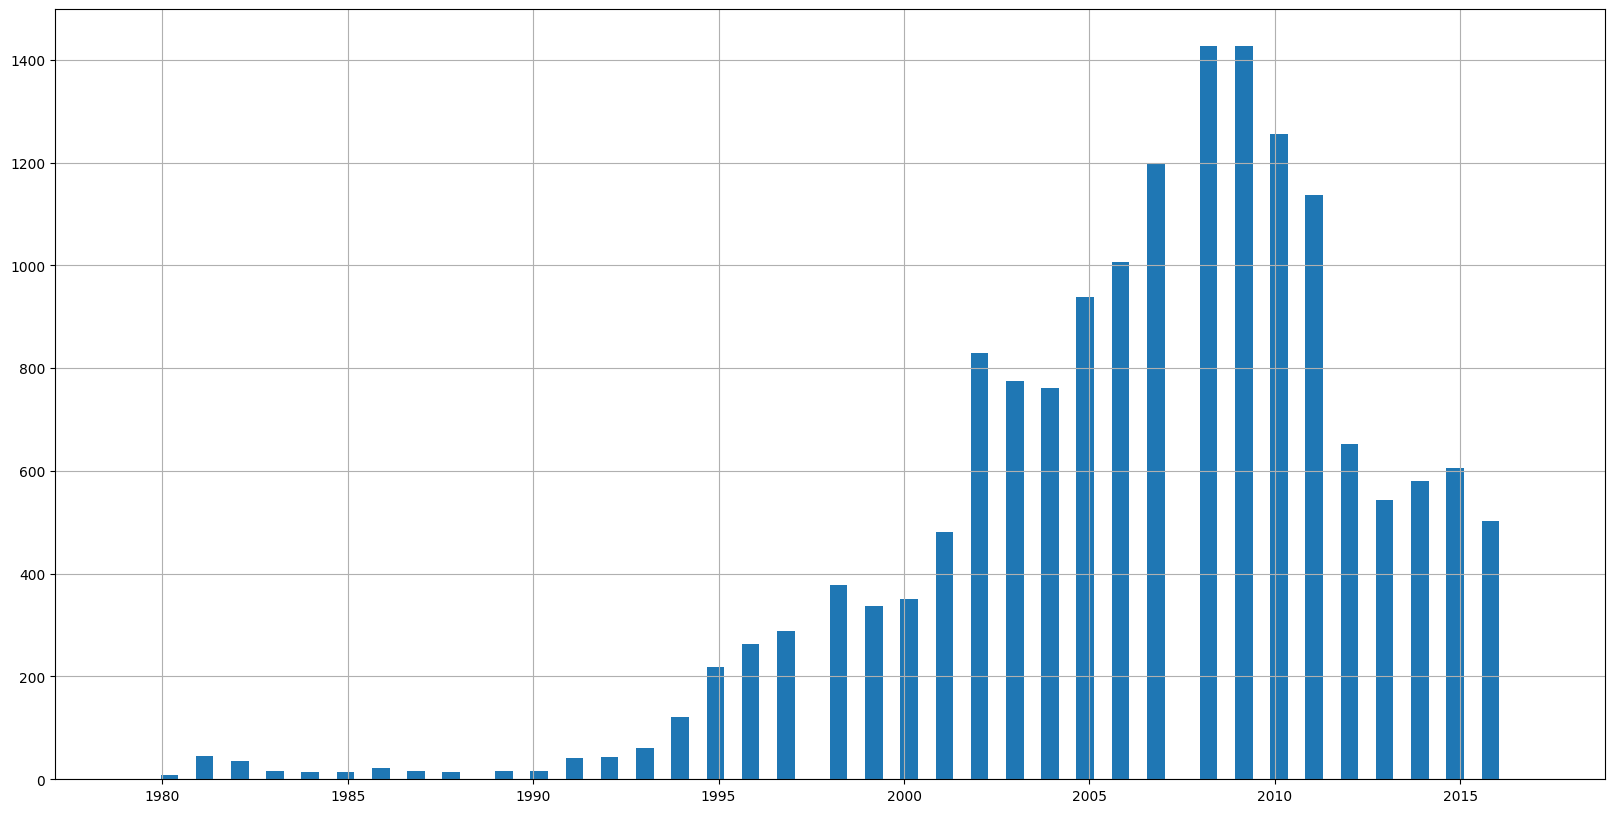

In [22]:
games['year_of_release'].hist(bins=80, range=(1979, 2017), figsize=(20, 10))

Компьютерные игры начали выпускать в 1980 году, до 1994 года их выпускалось крайне малое кол-во, с 1995 по 2001 производство игр было чуть на более высоком уровне, но скачок наблюдается в 2002 году, и достигло своего пика в 2008-2009 годах, после этого - некоторое снижениедо 2011 года, далее - резкий спад. Несмотря на скачок в 2002 году, далее произошел некоторый спад, до 2004 года, после чего, с 2005 наблюдается уверенный рост. В 2008 и 2009 продажи были на одном уровне, с 2010 начался спад, с 2011 по 2012 произошло резкое падение продаж, в период 2012-2016 процесс продаж представляет незначительные волны - был и подъем, и падение, возможно, это связано все с большим переходом пользователей на мобильные игры (в  телефоне), а для них нужны уже другие платформы.

<AxesSubplot: >

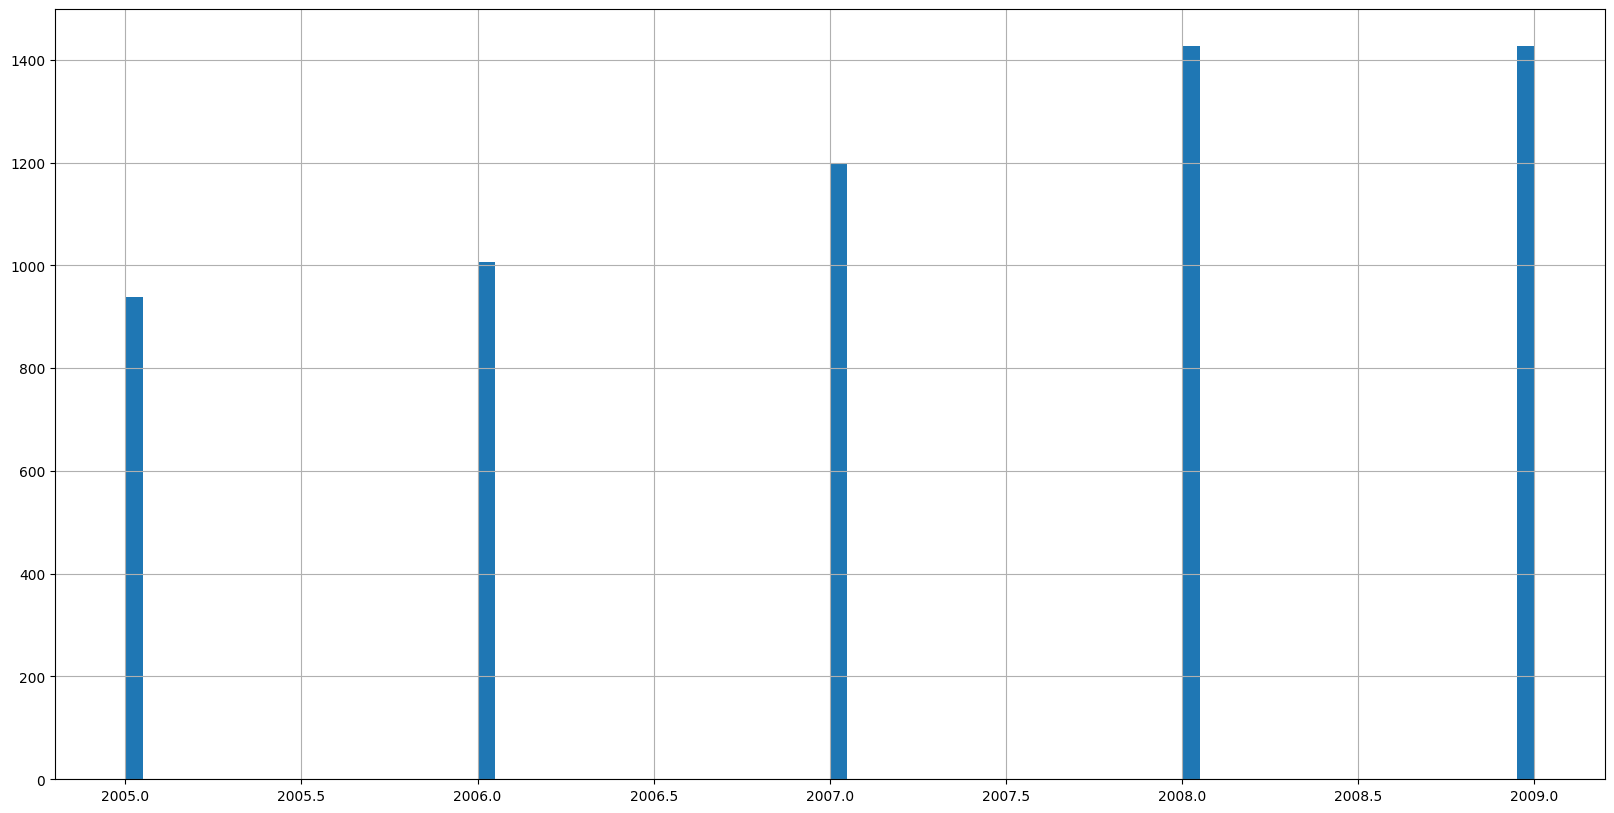

In [23]:
#посмотрим период с наибольшим кол-вом выпущенных игр - с 2005 по 2009 годы.
games['year_of_release'].hist(bins=80, range=(2005, 2009), figsize=(20, 10))

**Вывод:**

Данные за все периоды не так интересны. Наиболее интересны данные за период с 2005 по 2009 годы (как наиболее успешные), и период с 2010 по 2016 год (так как нам будет необходимо спланировать рекланые кампании на 2017 год), и как раз сравнить эти два периода.

## 4.2. Изменение продаж по платформам.

Посмотрим как менялись продажи по платформам, за весь период.

Text(0, 0.5, 'Название платформы')

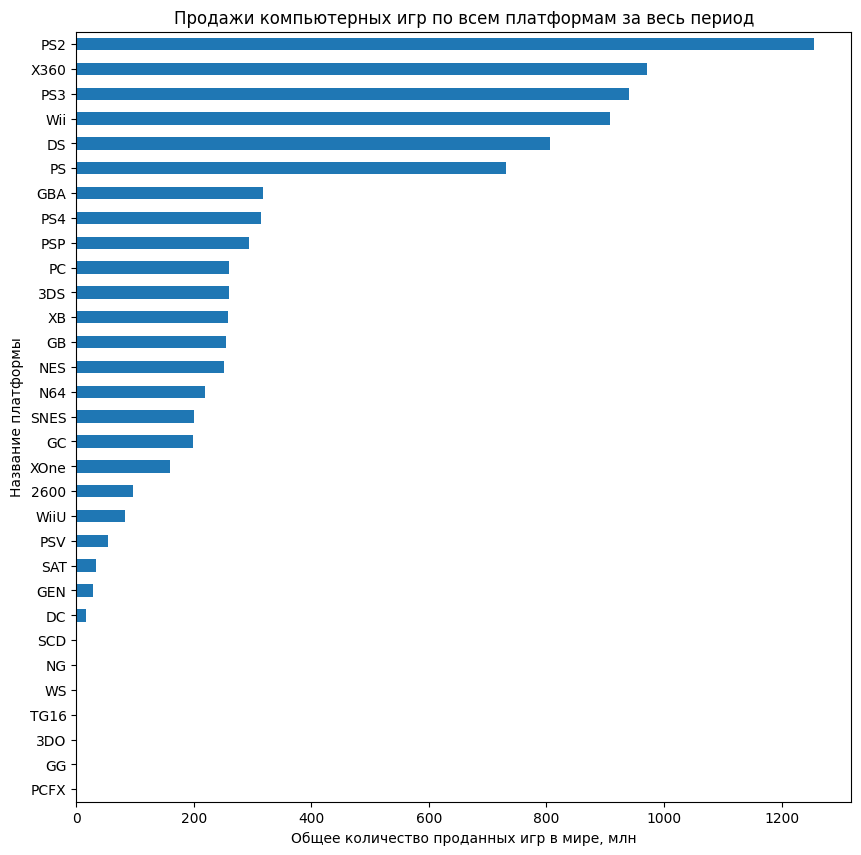

In [24]:
#посмотрим на графике как выглядит выпуск игр на каждой платформе
sales_platform = (
    games.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=True)
    .plot(kind='barh', figsize=(10, 10), legend=False, fontsize=10)
)
plt.title('Продажи компьютерных игр по всем платформам за весь период')
plt.xlabel('Общее количество проданных игр в мире, млн')
plt.ylabel('Название платформы')

In [25]:
games_top_10 = games['platform'].value_counts().head(10) # ТОП 10 платформ по популярности (наиболее используемые)
games_top_10
#games_top_10 = games.groupby('platform')['total_sales'] 

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
Name: platform, dtype: int64

In [26]:
games['platform'].unique() # перечень наименований платформ

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [27]:
#выведем ТОП 10 платформ по суммарным продажам игр
games_top_10_platform = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)
games_top_10_platform

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64

Text(0, 0.5, 'Название платформы')

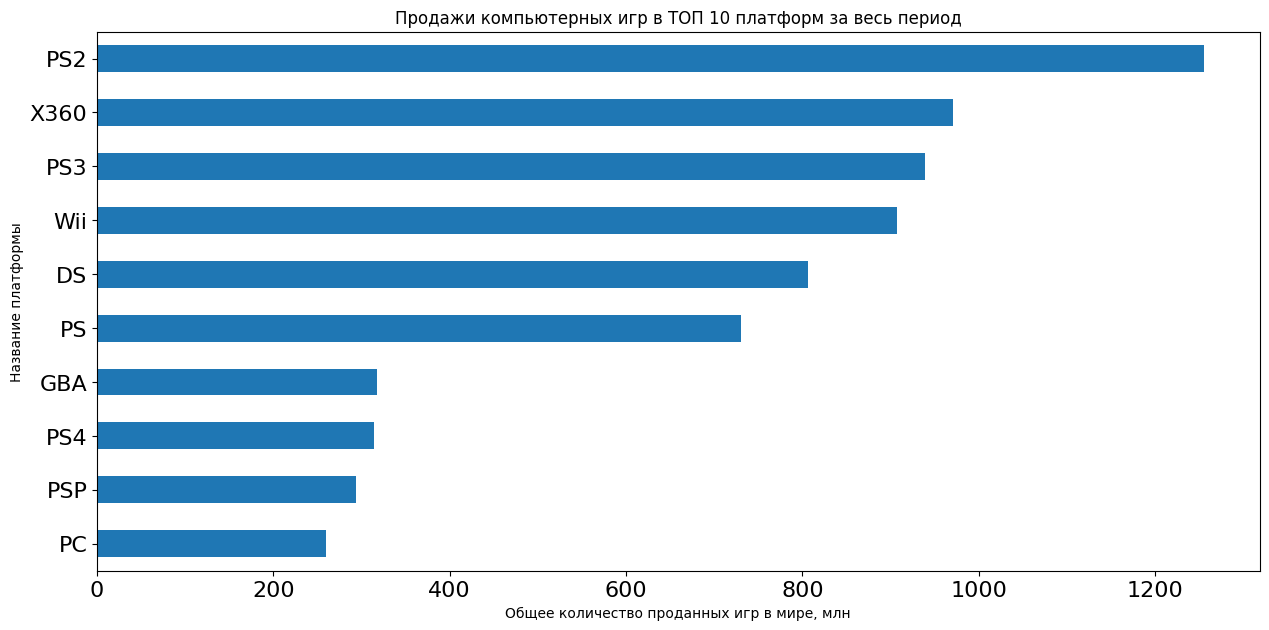

In [28]:
games_top_10_platform.sort_values(ascending = True).plot(kind = 'barh', figsize = (15, 7), legend = False, fontsize = 16)
plt.title('Продажи компьютерных игр в ТОП 10 платформ за весь период')
plt.xlabel('Общее количество проданных игр в мире, млн')
plt.ylabel('Название платформы')

Посмотрим как распределились продажи по годам в каждой платформе в ТОП 10 по суммарным продажам.

In [29]:
games_top_10_platform = games_top_10_platform.reset_index()
games_top_10_platform

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


Выбрали платформы с наибольшими суммарными продажами (ТОП 10 по суммарным продажам), и построим графики распределения продаж в каждой платформе по годам. Посмотрим характер продаж по каждой из рассматриваемых платформ за весь период. Попробуем ответить на вопрос - за какой характерный срок появляются новые и исчезают старые платформы?

<class 'pandas.core.series.Series'>
['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']


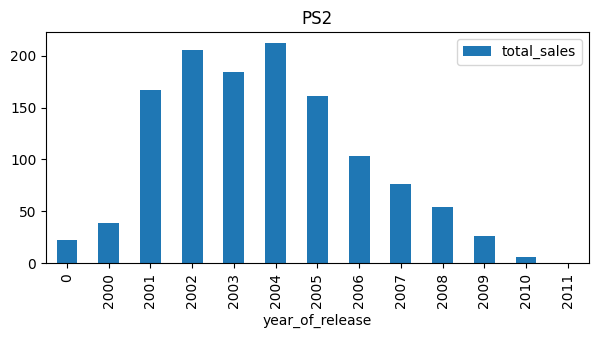

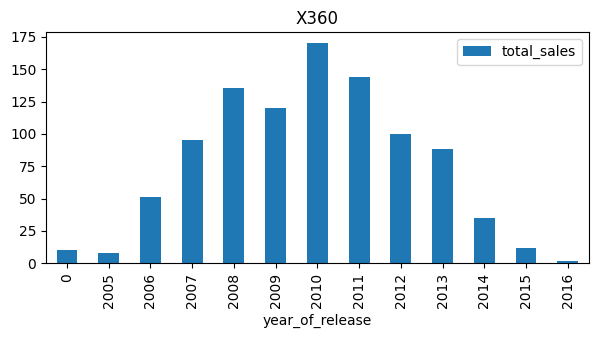

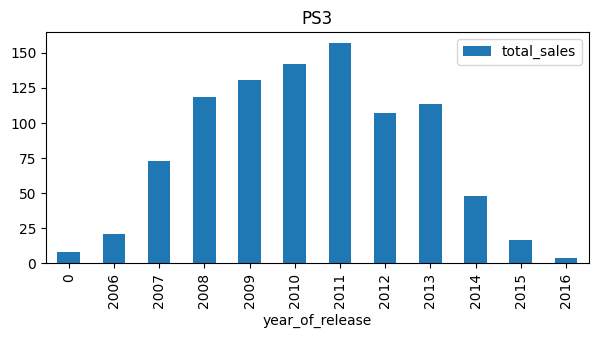

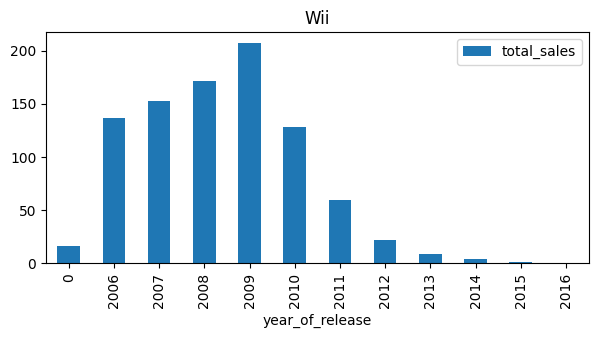

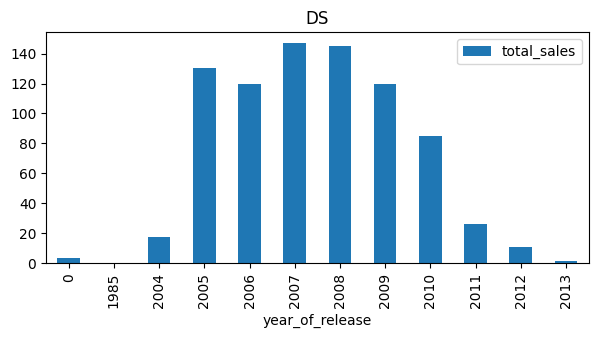

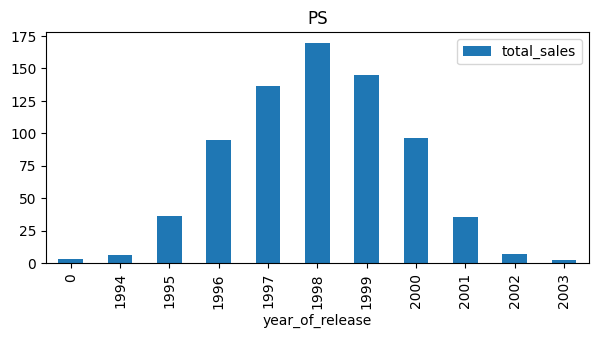

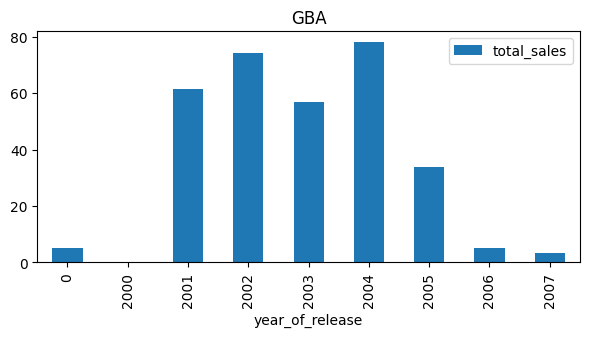

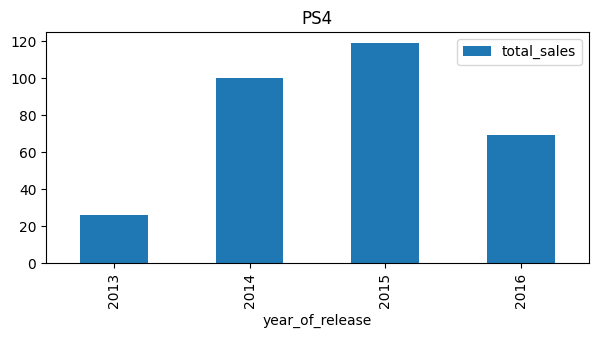

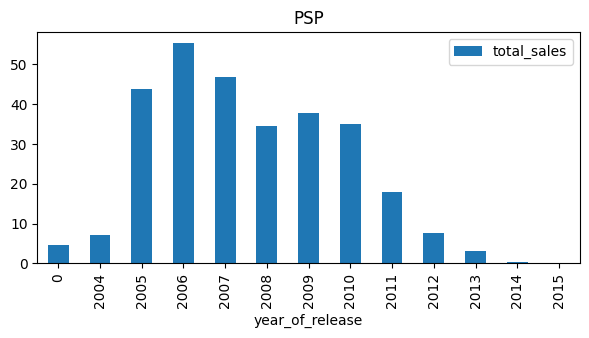

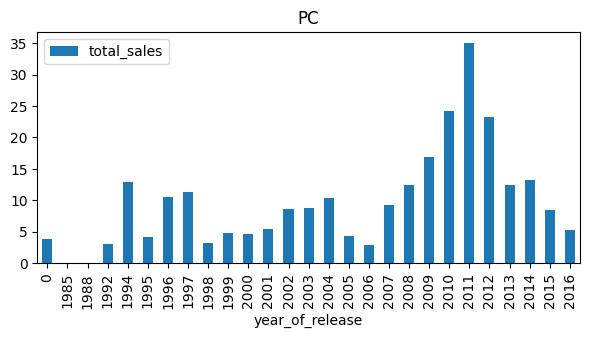

In [30]:
#games_top_10_platform = games_top_10_platform.reset_index()

platforms = games_top_10_platform['platform'].values.tolist()

print(type(games_top_10_platform['platform']))
for platform in platforms: 
    (
        games[games['platform'] == platform]
        .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
        .plot(kind = 'bar', figsize=(7,3))
    )
    
    plt.title(platform)

    #print(platform)
print(platforms)

**Вывод:**

Из рассмотренных ТОП 10 платформ каждая в среднем "живет" около 10 лет, за исключением двух - PS4 и PC. 

Про PS4 нельзя пока сделать вывод, так как она появилась только в 2013 году, а срез данных датируется 2016 годом (то есть её срок жизни еще в процессе). Эту платформу однозначно возьмем в дальнейшую выборку.

У платформы PC - наиболее долголетняя жизнь, начиная с 1992 г, было несколько пиков и падений, последний пик ее активности в 2011 г, в 2016г она еще жива, то есть на ней выходят игры. Эту платформу оставим для дальнейшего анализа, она наиболее перспективна.

В среднем характерный срок появления платформы (от её появления до пика) - 4-5 лет, срок исчезания (от пика до завершения) - 5-6 лет.

Из десяти наиболее прибыльных платформ большинство появилось в 2000х годах, в основном - в 2005-2006 гг.

Так как прогноз нам необходимо сделать на 2017 год, пять из десяти наиболее прибыльных платформ к 2016 году уже исчезли, а срок жизни каждой платформы мы определелилит равным 10 лет, актуальным периодом для анализа можно считать 2006-2016 годы.

<div class="alert alert-info" role="alert">

Возьмем другой период, более точно покажущий нам результаты. Если период роста, как и падения - 5 лет, то для анализа логично взять период 2011-2016 гг (5 лет включая 20112 и 2016 годы), тем более это период наиболее стабильной картины продаж после резкого спада в 2011 году.
    
Еще раз пройдемся по платформам и жанрам, уже за этот период - см. ниже, после итогового вывода.

</div>  

## 4.3. Определение актуального периода и актуальных платформ за этот период.

In [31]:
#сделаем срез за выбранный для анализа актуальный период
games_actual = games.query('year_of_release >= 2006')['platform'].value_counts()
print(games_actual)
games_actual.info()

DS      1979
PS3     1306
Wii     1286
X360    1214
PSP     1083
PS2      805
PC       776
3DS      512
PSV      429
PS4      392
XOne     247
WiiU     147
XB        66
GBA       45
GC        44
DC         2
Name: platform, dtype: int64
<class 'pandas.core.series.Series'>
Index: 16 entries, DS to DC
Series name: platform
Non-Null Count  Dtype
--------------  -----
16 non-null     int64
dtypes: int64(1)
memory usage: 256.0+ bytes


<AxesSubplot: >

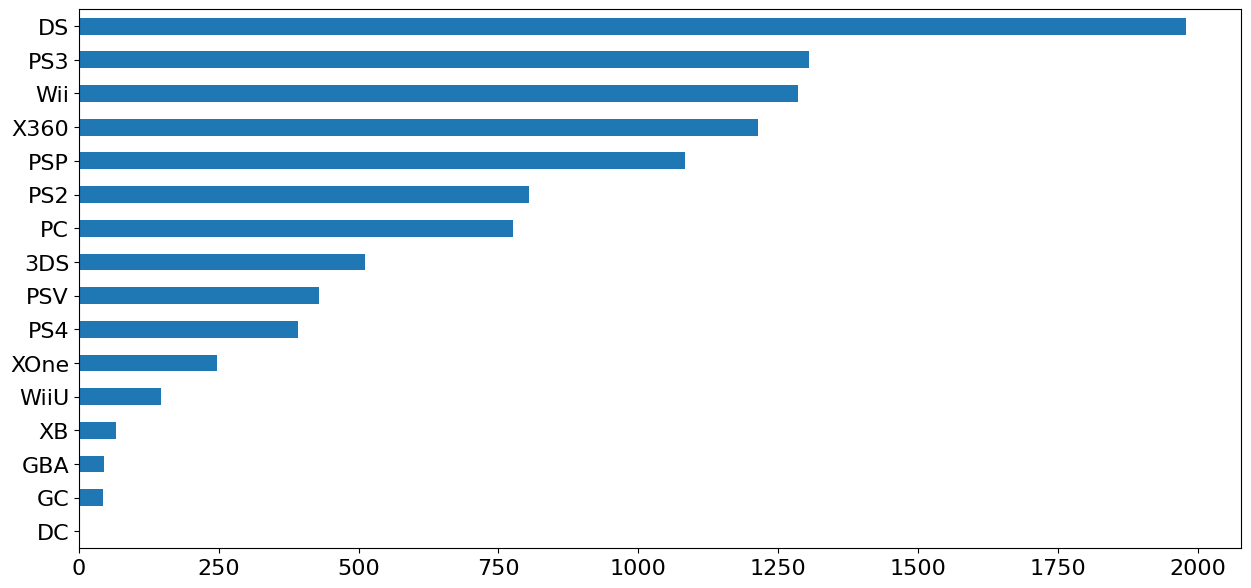

In [32]:
#сколько игр в каждой платформе выпускались после 2006 года
games_actual.sort_values(ascending = True).plot(kind = 'barh', figsize = (15, 7), legend = False, fontsize = 16)

In [33]:
games_actual = games_actual.reset_index()
games_actual.columns = ['platform', 'games_count']
games_actual

,platform,games_count
0,DS,1979
1,PS3,1306
2,Wii,1286
3,X360,1214
4,PSP,1083
5,PS2,805
6,PC,776
7,3DS,512
8,PSV,429
9,PS4,392


По каждой платформе посмотрим продажи по годам, за период после 2006 года. Выберем срез платформ именно в этот период.

<class 'pandas.core.series.Series'>
['DS', 'PS3', 'Wii', 'X360', 'PSP', 'PS2', 'PC', '3DS', 'PSV', 'PS4', 'XOne', 'WiiU', 'XB', 'GBA', 'GC', 'DC']


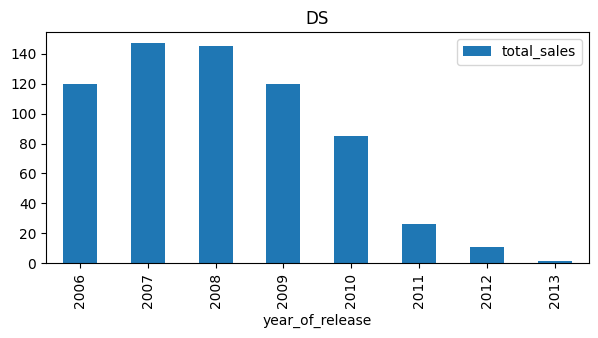

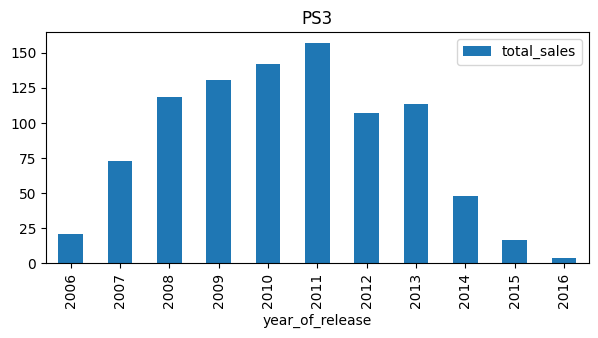

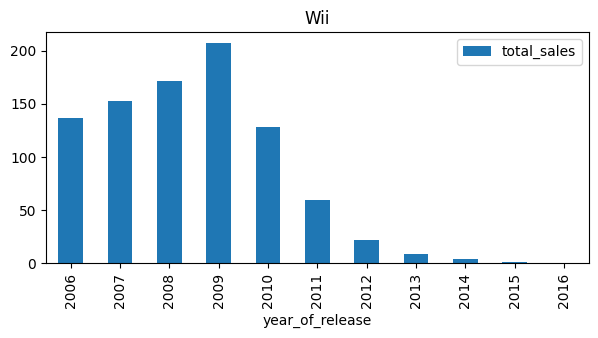

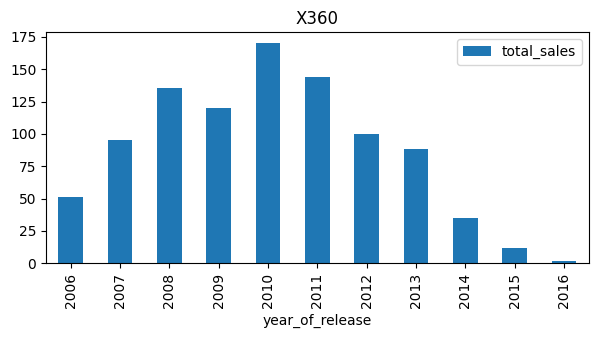

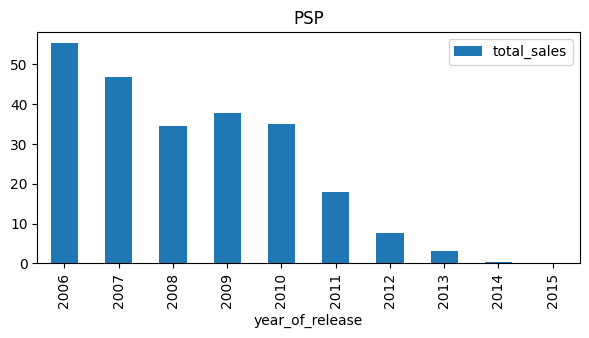

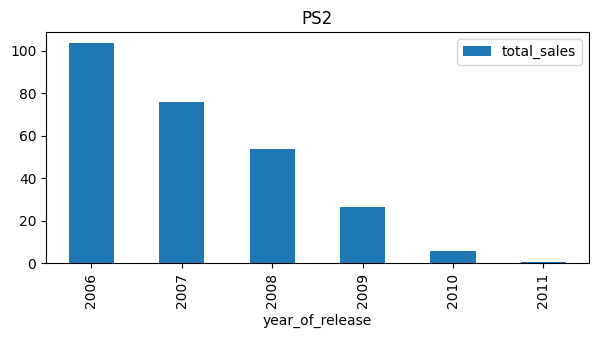

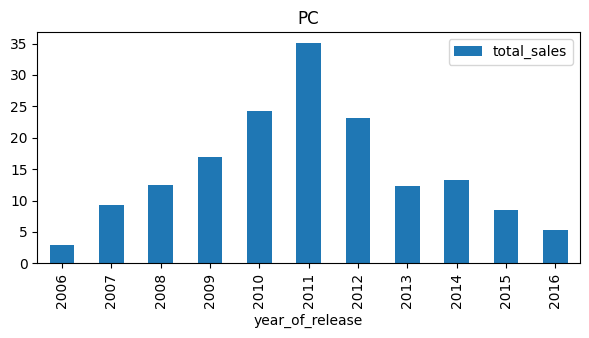

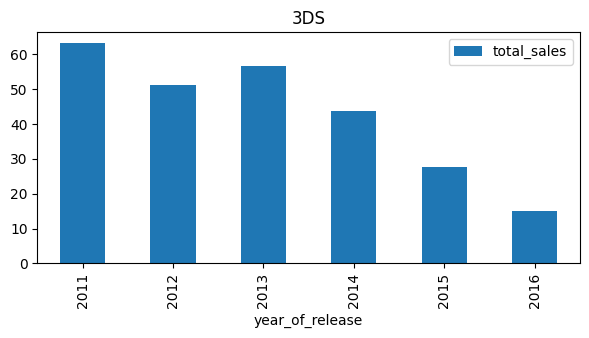

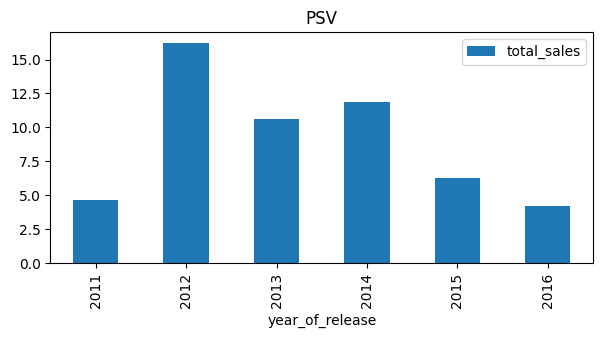

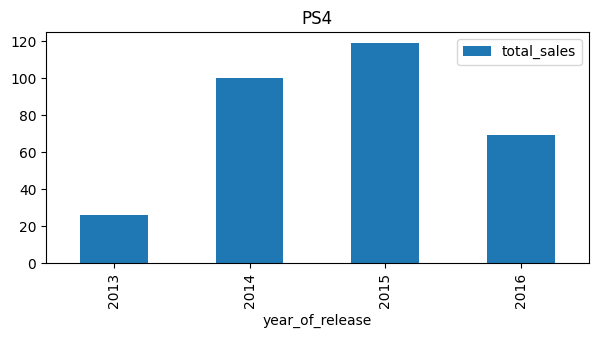

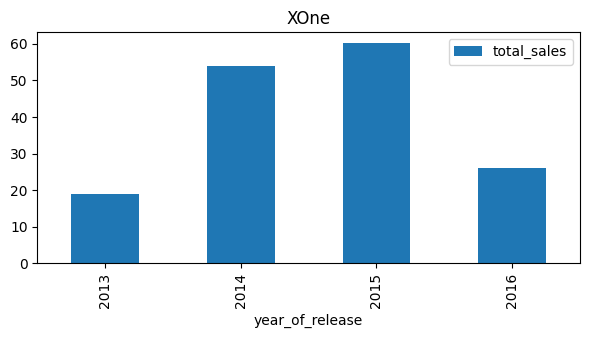

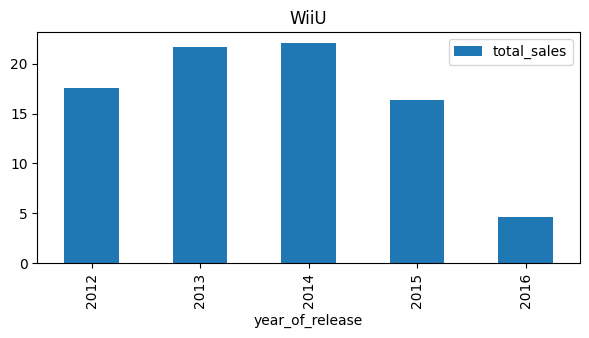

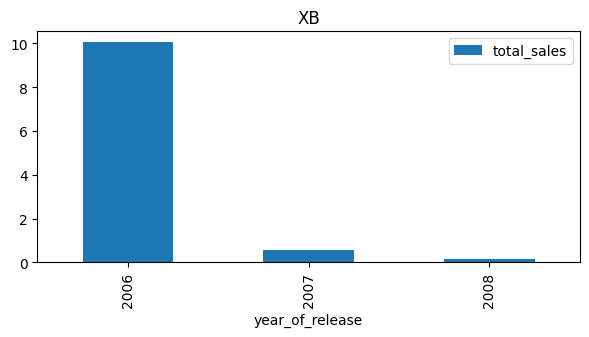

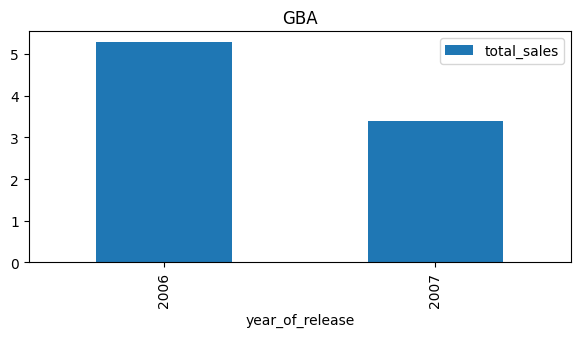

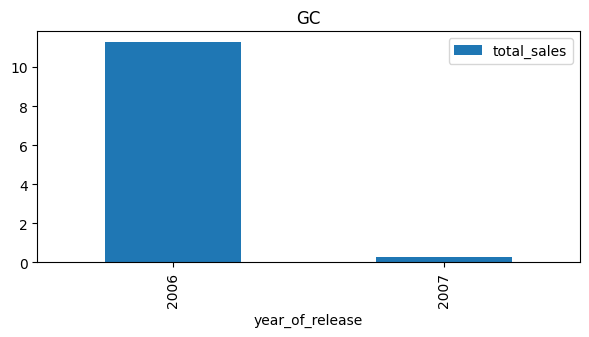

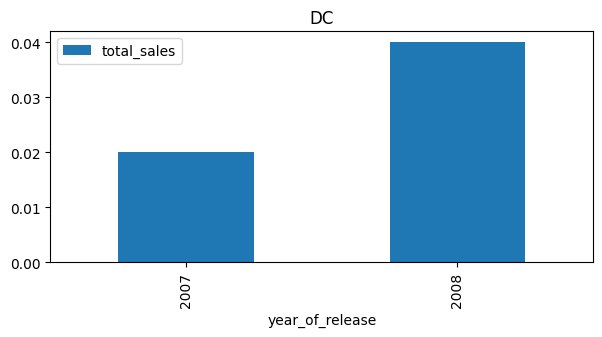

In [34]:
platforms_actual = games_actual['platform'].values.tolist()

print(type(games_actual['platform']))
for platform in platforms_actual: 
    (
        games.loc[(games['platform'] == platform) & (games['year_of_release'] >= 2006)]
        .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
        .plot(kind = 'bar', figsize=(7,3))
    )
    
    plt.title(platform)

    #print(platform)
print(platforms_actual)

Точно не берем в дальнейшее исследование следующие платформы:
 - DS -закончила своё существование в 2013 году
 - Wii - перестала работать в 2016 г
 - PSP - закончилась в 2015 году, пик продаж был в 2006 году
 - PS2 - с 2006 года падение, после 2011 года уже её нет
 - XB - с пиком в 2006 году после 2008 нет продаж
 - GBA и GC - в данном периоде существовали только в 2006 и 2007 годах
 - DC - несмотря на то, чтопик в 2008 году, после него нет данных
 
 Для дальнейшего анализа остаются платформы:
  - PS3 - хотя пика продажи достигли в 2011 году, в 2016 значительный спад, пока не надо пренебрегать этими продажами
  - X360 - аналогично, пик в 2010 г
  - PC - самая потенциальная платформа по "живучести", самый длительный период жизни, хотя пик был в 2011 г, на протяжении всего периода были и всплески продаж, и спады, поэтому надо исследовать эту платформу, принять в анализ
  - 3DS и PSV - пикии продаж были в 2011 и 2012 г соответственно, но несмотря на происходящий спад, надо проверить все факторы
  - PS4 и XOne - однозначно оставляем для анализа, пик - в 2015 году
  - WiiU - пик относительно недавно, в 2014, оставляем пока, дальше посмотрим
  
**Вывод:**

Итак, оставим для дальнейшего исследования 8 наиболее прибыльных платформ, далее, возможно, еще отбросим.
  

Посмотрим, как соотносятся выборки ТОП 10 по суммарным подажам, и за период 2006-2016 годы.

Text(0, 0.5, 'Продажи, млн копий')

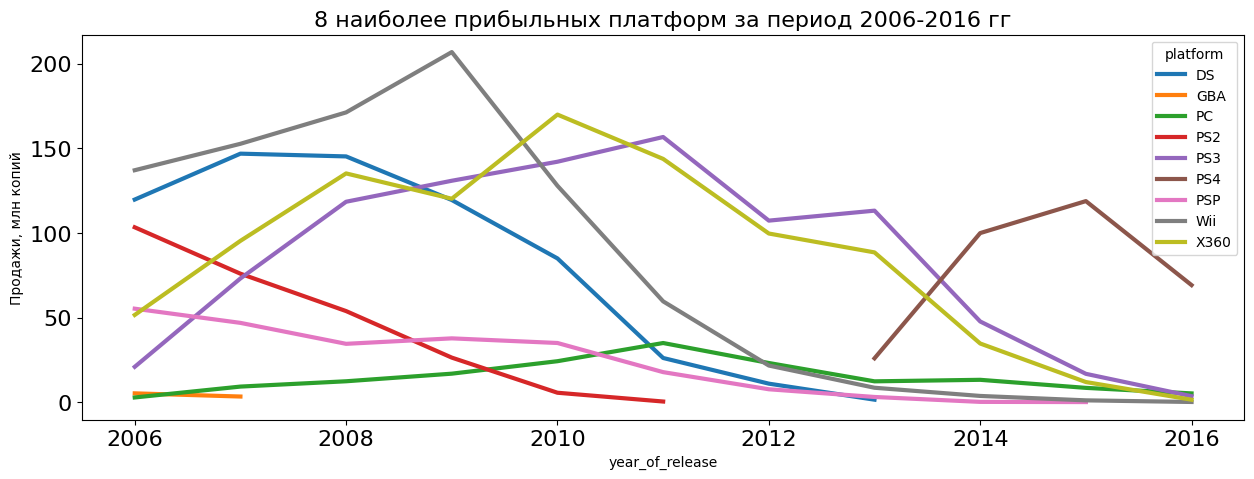

In [35]:
(
    games.query('platform in @platforms and year_of_release >= 2006')
    .pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum')
    .plot(figsize=(15, 5), fontsize = 16, linewidth= 3)
)
plt.title('8 наиболее прибыльных платформ за период 2006-2016 гг', fontsize=16)
plt.ylabel('Продажи, млн копий')

По всем платформам наблюдается снижение продаж к 2016 году.

Рассмотрим каждую платформу на этом графике.

Подтвердим удаление из выборки следующих:

 - GBA - закончилась на 2007 году
 - PS2 - после 2011 года нет
 - DS - нет после 2013 года
 - PSP - прекратилась в 2015 г
 - Wii -прекратила свое существование в 2016
 - X360 и PS3 - несмотря на бурный рост к 2010 и 2011 гг соответственно, к 2016 г сошли на ноль
 
Из всех 8 платформ, соответствующим обоим критериям сохранения для исследования (ТОП 10 и период после 2006 года) остается одна - PC, хотя абсолютные значения продаж ниже других платформ, она наиболее стабильна, следовательно, потенциальна. Также, однозначно интересна и потенциальна платформа PS4, так как появилась она только в 2013 году, пик продаж был в 2015, средний срок её жизни еще далек от завершения.

**Вывод:**

После разбора платформ по двум критериям - ТОП 10 по суммарным продажам и период успешного существования после 2006 года - для дальнейшего анализа оставим следующие:

 - PC, PS4, XOne, 3DS, PSV, WiiU

## 4.4. График «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

In [36]:
#определили перечень потенциально прибыльных платформ, с которым будем дальше работать
games_platform_potenc = games.query('platform == "PC" \
                                    or platform == "PS4" \
                                    or platform == "XOne" \
                                    or platform == "3DS" \
                                    or platform == "PSV" \
                                    or platform == "WiiU"')
                            
games_platform_potenc

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
40,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85.0,8.2,E,12.65
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16705,15 Days,PC,2009,Adventure,0.00,0.01,0.00,0.00,63.0,5.8,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


Text(0.5, 0, 'Платформы')

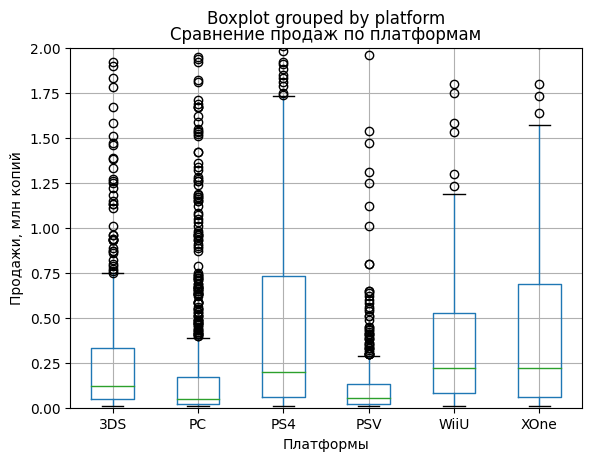

In [37]:
games_platform_potenc.boxplot(column = 'total_sales', by='platform').set(ylim=(0, 2))
plt.title('Сравнение продаж по платформам')
plt.ylabel('Продажи, млн копий')
plt.xlabel('Платформы')

In [38]:
games_platform_potenc.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,1514.000000,1626.000000,2710.000000
mean,1992.971587,0.158878,0.160461,0.056111,0.040875,73.303831,6.941882,0.416325
std,196.229016,0.458354,0.461113,0.248033,0.122958,12.290713,1.486753,1.070134
min,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,1.400000,0.010000
25%,2011.000000,0.000000,0.000000,0.000000,0.000000,66.000000,6.125000,0.030000
50%,2013.000000,0.010000,0.030000,0.000000,0.010000,75.000000,7.300000,0.090000
75%,2015.000000,0.100000,0.110000,0.030000,0.030000,82.000000,8.000000,0.310000
max,2016.000000,6.030000,6.420000,4.390000,2.380000,97.000000,9.300000,14.630000


Наибольшие медианные продажи у платформ WiiU и XOne (почти на одном уровне), чуть меньше у PS4. Это наиболее прибыльные платформы.

Положение XOne(Xbox One) и PS(PlayStation) 4 можно объяснить тем, что данные приставки позднее остальных вышли на рынки - в 2013 г. Также и WiiU - преемник платформы Wii, вышел ей на смену в 2012 году, когда у Wii пошел сильный спад.
Преимущество WiiU - новый контроллер, который может использоваться как дополнительный сенсорный экран, что позволит игроку получить новые игровые ощущения, а в некоторых играх мог частично заменить телевизор, играя через GamePad.

3DS и PSV обе вышли в 2011 г, когда был пик у PC.

PC (ПК) - самые стабильные, больше всех держатся на плову, несмотря на самые низкие медианные продажи, отличаются стабильностью, и это объяснимо - приставки выходят одна за другой, конкурируя своими преимуществами, новыми фишками, а ПК - стабильно предлагает определенного уровня игры, для них есть свой постоянный потребитель.

Приставки - безусловно больше подходят для игр.

Почти у всех платформ есть много выбросов - скорее всего это игры которые раздавались беслпатно, были различные акции, и т.д.

## 4.5. Влияние на продажи отзывов пользователей и критиков.

Рассмотрим более подробно три наиболее популярные платформы (по медиане суммарных продаж): XOne, WiiU и PS4.
Как влияют на продажи отзывы критиков и пользователей.

**Платформа XOne**

In [39]:
#посмотрим зависимость продаж от оценок на платформе XOne
g_XOne = games_platform_potenc.query('platform == "XOne"')
g_XOne[['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.472462,0.416998
user_score,0.472462,1.000000,-0.068925
total_sales,0.416998,-0.068925,1.000000


По платформе XOne корреляция между отзывами и продажами:
Оценки критиков влияют на продажи довольно значимо, покупатели прежде чем сделать покупку игры, анализируют оценки критиков, и это способствует продажам, а вот оценки пользователей не столь значимы, можно сказать, что они не принимаются во внимание.

<AxesSubplot: xlabel='critic_score', ylabel='total_sales'>

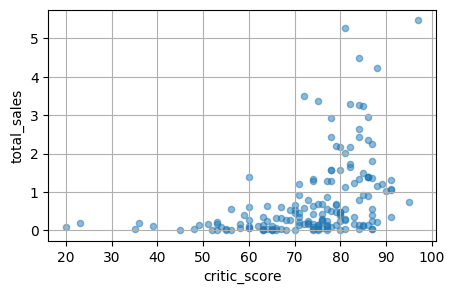

In [40]:
#влияние на продажи оценок критиков
g_XOne.plot(x='critic_score', y='total_sales', kind='scatter', grid=True, alpha=0.5, figsize=(5, 3))

<AxesSubplot: xlabel='user_score', ylabel='total_sales'>

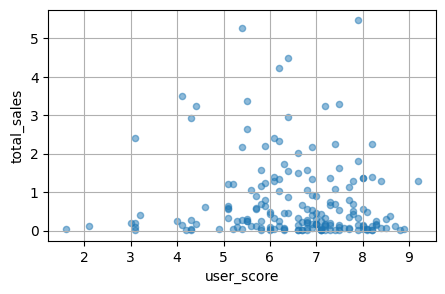

In [41]:
#зависимость продаж от оценок пользователей
g_XOne.plot(x='user_score', y='total_sales', kind='scatter', grid=True, alpha=0.5, figsize=(5, 3))

<AxesSubplot: xlabel='user_score', ylabel='critic_score'>

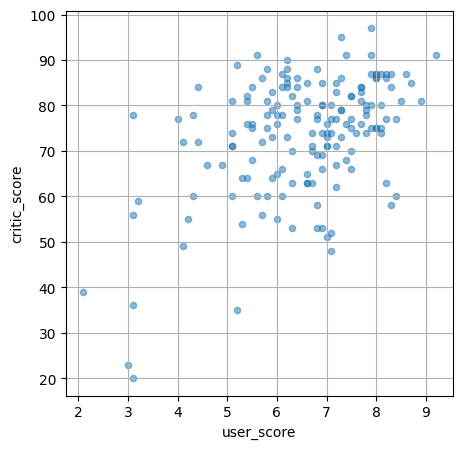

In [42]:
#посмотрим как соотносятся друг к другу оценки пользователей и критиков
g_XOne.plot(x='user_score', y='critic_score', kind='scatter', grid=True, alpha=0.5, figsize=(5, 5))

**Вывод по платформе XOne:** 

Несмотря на разную значимость отзывов игроков и критиков об игре XOne, можно сделать вывод, что они все равно совпадают, и не противоречат друг другу, только в разной степени влияния на продажи.

**Платформа WiiU**

In [43]:
g_WiiU = games_platform_potenc.query('platform == "WiiU"')
g_WiiU[['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.00000,0.770080,0.348380
user_score,0.77008,1.000000,0.400219
total_sales,0.34838,0.400219,1.000000


<AxesSubplot: xlabel='critic_score', ylabel='total_sales'>

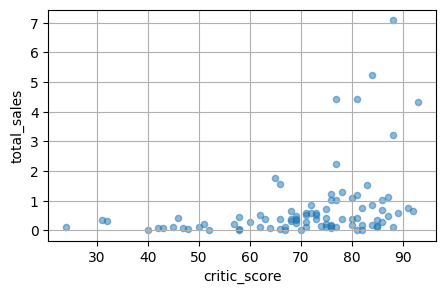

In [44]:
g_WiiU.plot(x='critic_score', y='total_sales', kind='scatter', grid=True, alpha=0.5, figsize=(5, 3))

<AxesSubplot: xlabel='user_score', ylabel='total_sales'>

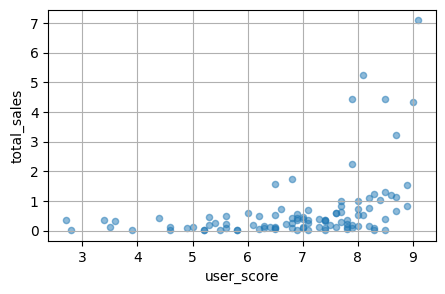

In [45]:
g_WiiU.plot(x='user_score', y='total_sales', kind='scatter', grid=True, alpha=0.5, figsize=(5, 3))

<AxesSubplot: xlabel='user_score', ylabel='critic_score'>

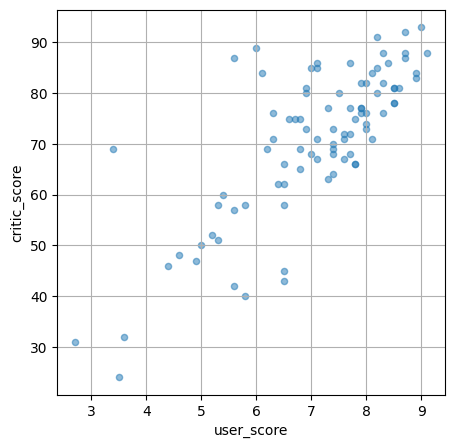

In [46]:
g_WiiU.plot(x='user_score', y='critic_score', kind='scatter', grid=True, alpha=0.5, figsize=(5, 5))

**Платформа PS4**

In [47]:
g_PS_4 = games_platform_potenc.query('platform == "PS4"')
g_PS_4[['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
total_sales,0.406568,-0.031957,1.000000


<AxesSubplot: xlabel='critic_score', ylabel='total_sales'>

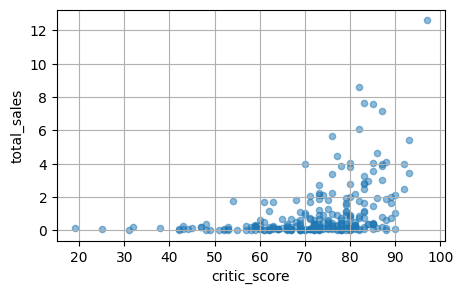

In [48]:
g_PS_4.plot(x='critic_score', y='total_sales', kind='scatter', grid=True, alpha=0.5, figsize=(5, 3))

<AxesSubplot: xlabel='user_score', ylabel='total_sales'>

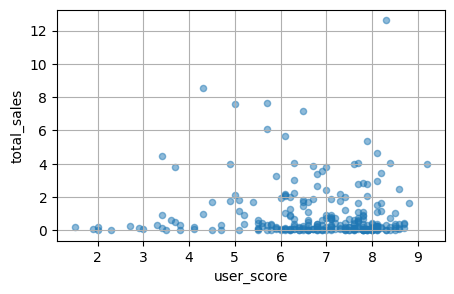

In [49]:
g_PS_4.plot(x='user_score', y='total_sales', kind='scatter', grid=True, alpha=0.5, figsize=(5, 3))

<AxesSubplot: xlabel='user_score', ylabel='critic_score'>

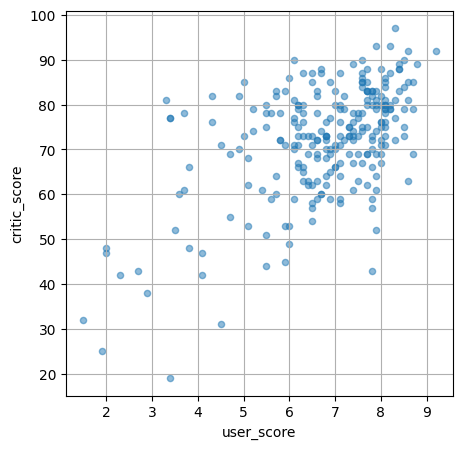

In [50]:
g_PS_4.plot(x='user_score', y='critic_score', kind='scatter', grid=True, alpha=0.5, figsize=(5, 5))

**Общий вывод по п.4.5:**
    
Как показали диаграммы рассеяния по трем самым популярным и прибыльным платформам - XOne, WiiU и PS4 - во всех трех платформах картина идентичная: на продажи больше влияют оценки критиков и специалистов, корреляция около 0,4 в каждой из платформ.

Отзывы игроков/пользователей не так сильно влияют на продажи игр на платформах XOne PS4, но если их учесть, заметно, что они показывают хоть и незначительный, но даже и некоторый отрицательный результат, так как если пользователь и пишет отзывы, то в основном, чтобы оставить негативный отзыв (что не устраивает в игре/приставке), чтобы донести до других игроков.

А вот отзывы игроков о платформе WiiU наоборот, прямо положительно влияют на продажи, и довольно значимо (корреляция 0,4). И это объяснимо, как мы уже отмечали ранее, приставка WiiU - современная, пришедшая на смену своему предшественнику Wii с явным  преимуществом перед другими, она выпущена в конце 2012 года, и конкурировала и с XOne, и с PS4. И игроки об этих преимуществах, конечно, пишут отзывы.

Преимущества WiiU - поддерживает графику высокой четкости. Основным контроллером системы является геймпад Wii U, который оснащен встроенным сенсорным экраном, кнопками управления, аналоговыми джойстиками и кнопками действий. Экран можно использовать либо как дополнение к основному дисплею, либо в поддерживаемых играх, чтобы играть в игру непосредственно на геймпад. Все это сильно отличает WiiU от других консолей.

## 4.6. Распределение игр по жанрам. Самые прибыльные жанры.

**Распределение игр по жанрам**

In [51]:
#будем рассматривать выборку по играм, выпущенным после 2006 года
games_genre = (
    games.query('year_of_release >= 2006')
    .pivot_table(index='genre', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False).reset_index()
    .rename_axis(None, axis=1)
)
games_genre

,genre,total_sales
0,Action,1116.65
1,Sports,793.85
2,Shooter,717.04
3,Misc,554.86
4,Role-Playing,522.40
5,Racing,299.00
6,Platform,279.74
7,Simulation,220.65
8,Fighting,188.42
9,Adventure,141.35


Text(0, 0.5, 'Продажи, млн копий игр')

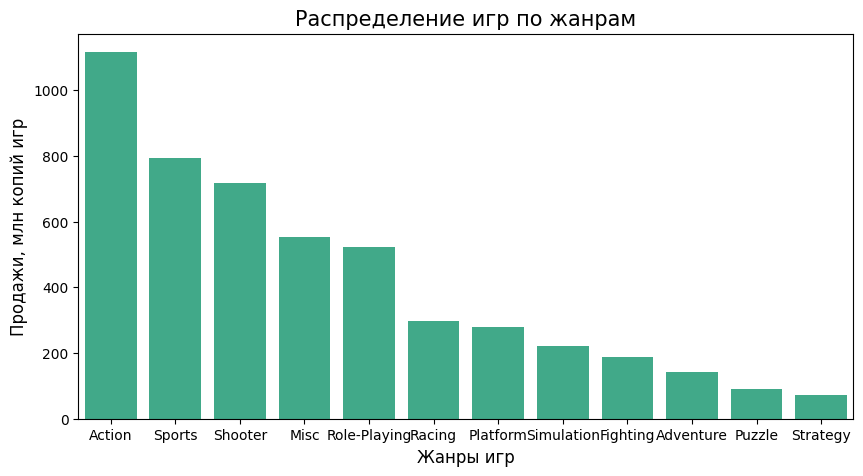

In [52]:
#Посмотрим, как выглядит распределение игр по жанрам - по кол-ву игр в каждом жанре, в выборке после 2006 г выпуска
plt.figure(figsize=(10,5))
plt.title('Распределение игр по жанрам', fontsize=15)
sns.barplot(data=games_genre, x='genre', y='total_sales', color='#30ba8f')
plt.xlabel('Жанры игр', fontsize=12)
plt.ylabel('Продажи, млн копий игр', fontsize=12)

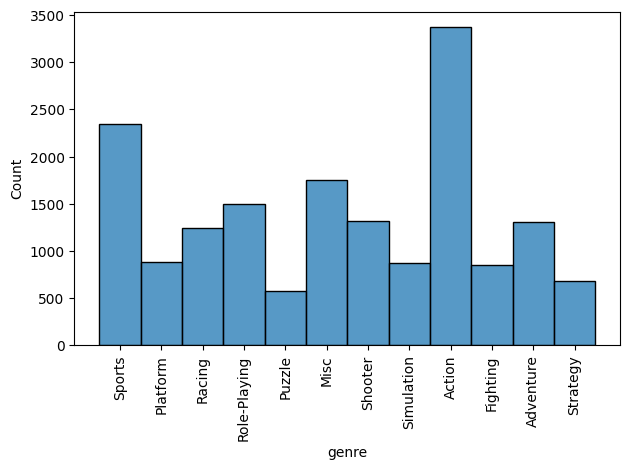

In [53]:
#распределение жанров в исходной выборке
#result = games.groupby(['genre'])['total_sales'].median().reset_index().sort_values('total_sales')
genre_plot = sns.histplot(games['genre'], binwidth=0.05) #, order=result['genre'])
plt.setp(genre_plot.get_xticklabels(), rotation=90)
plt.tight_layout()

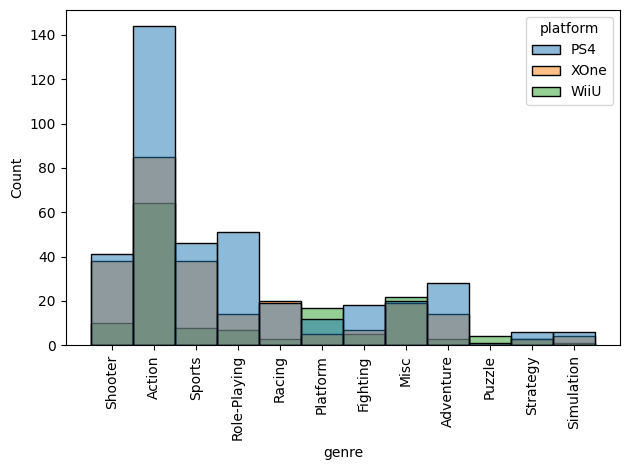

In [54]:
#как распределились жанры среди трех самых популярных и прибыльных платформ
games_platform_popular = games.query('platform == "PS4" \
                                    or platform == "XOne" \
                                    or platform == "WiiU"')
#games_platform_popular
#popular_plot = sns.histplot(games_platform_popular['genre'], binwidth=0.05) 
popular_plot = sns.histplot(data=games_platform_popular, x="genre", binwidth=0.05, hue="platform")
plt.setp(popular_plot.get_xticklabels(), rotation=90) 
plt.tight_layout()

Text(0, 0.5, 'Продажи, млн копий игр')

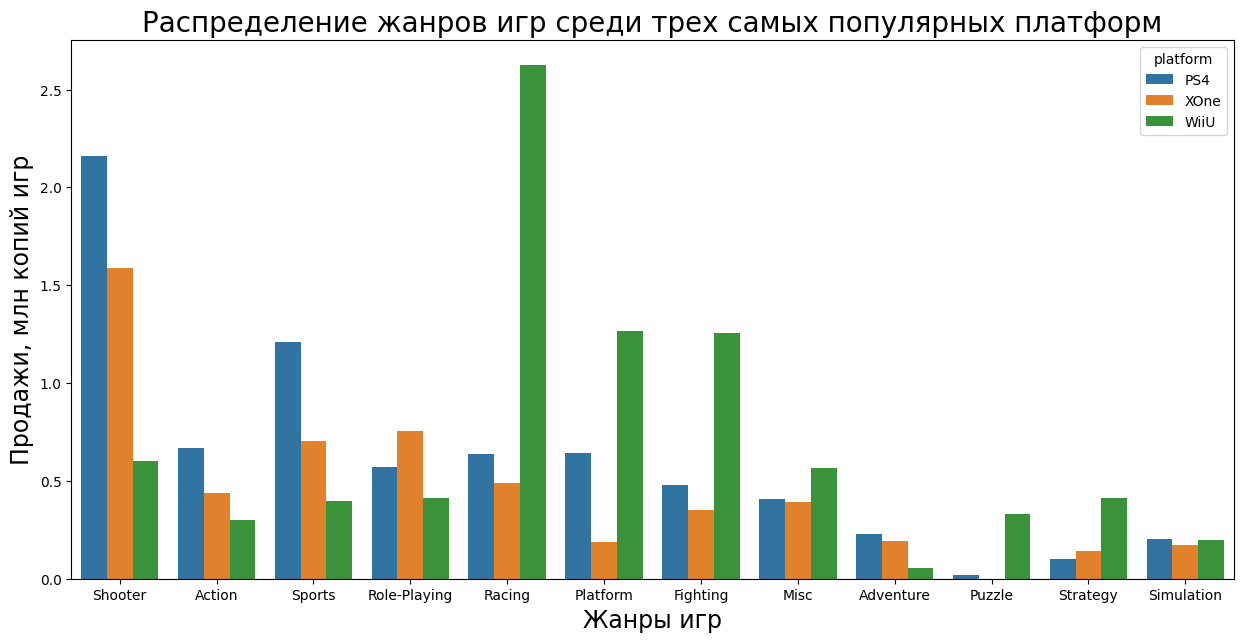

In [55]:
plt.figure(figsize=(15,7))
#fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x='genre', y='total_sales', hue='platform', ci=None, data=games_platform_popular)
plt.title('Распределение жанров игр среди трех самых популярных платформ', fontsize=20)
plt.xlabel('Жанры игр', fontsize=17)
plt.ylabel('Продажи, млн копий игр', fontsize=17)

**Вывод:**

На все протяжении периода исследования лидирует жанр **Аction**, вторым идет **Sports**, далее - **Misc** (другие/прочие/разные) и **Role-Playing**/Ролевые игры, **Shooter** и **Racing**/Гонки, также - **Adventure**/Приключение. За последние 10 лет (2006-2016 гг) Shooter и Misc поменялись местами (стрельба стала на третьем месте), а Adventure	скатилось на девятое. 

На сегодняшний день **самые популярные жанры: Аction, Sport и Shooter**.

**На последнем месте по популярности: Puzzle и Strategy** - как на протяжении всего периода, так и в настоящее время.

Среди трех самых прибыльных платформ рейтинг игр по жанрам следующий:
 - **WiiU**: далеко впереди всех Racing, Fighting и Platform ("прыгалки, лазилки") идут на одном уровне, меньше всего пользуется спросом Adventure;
 - **PS4**: игры в жанре Shooter и Sports, далее на одном уровне Аction, Racing и Platform, Role-Playing тоже недалеко от них, последнее место Puzzle;
 - **XOne**: с большим отрывом лидирует жанр Shooter, далее Sports и Role-Playing, чуть меньше Racing, в хвосте плетется Puzzle.

Несмотря на то, что XOne и PS4 появились в одно время, XOne отстает в продажах, видимо причины в том, что игры на этой приставке предполагают только онлайн-участие, постоянное подключение к интернету, когда как PS4 дает возможность обмениватья играми и продавать их на вторичном рынке.


<div class="alert alert-info" role="alert">

Исправим подход для подбора метрики (медиану или среднее) - в новом анализе по вновь выбранному, более коротком упериоду - см. ниже


</div>  

# 5. Портрет пользователя региона.

Определите для пользователя каждого региона (NA, EU, JP):
•	Самые популярные платформы (топ-5). Опишите различия в долях продаж.
•	Самые популярные жанры (топ-5). Поясните разницу.
•	Влияет ли рейтинг ESRB на продажи в отдельном регионе?


## 5.1. ТОП 5 самых популярных платформ региона.

In [56]:
#ранее сформированную выборку платформ после 2006 года мы изменили, поэтому создадим снова,
#чтобы использовать для работы с регионами:
games_actual_new = games.query('year_of_release >= 2006')
games_actual_new
#games_actual_reg.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,unknown,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


In [57]:
games_actual_new['platform'].value_counts()

DS      1979
PS3     1306
Wii     1286
X360    1214
PSP     1083
PS2      805
PC       776
3DS      512
PSV      429
PS4      392
XOne     247
WiiU     147
XB        66
GBA       45
GC        44
DC         2
Name: platform, dtype: int64

In [58]:
#сгруппимруем суммарные продажи по платформам и регионам
games_by_platform_sales = games_actual_new.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].sum()
games_by_platform_sales

,na_sales,eu_sales,jp_sales,other_sales,total_sales
platform,,,,,
3DS,82.65,61.27,100.62,13.27,257.81
DC,0.00,0.00,0.06,0.00,0.06
DS,323.99,142.99,141.49,46.88,655.35
GBA,5.15,1.88,1.51,0.14,8.68
GC,8.72,2.34,0.21,0.26,11.53
PC,44.45,100.32,0.00,18.65,163.42
PS2,114.89,46.28,35.93,68.70,265.80
PS3,390.13,327.21,79.41,134.59,931.34
PS4,108.74,141.09,15.96,48.35,314.14


In [59]:
#для добавления по одному столбцу для каждого региона - доли продаж каждой платформы в регионе в общих
#пропишем цикл
sales_column_names = []
shares_column_names = []
for (column_name, column) in games_by_platform_sales.transpose().iterrows():
    #print (column_name)
    if column_name !='total_sales':
        print (column_name)
        new_column_name = column_name + '_share'
        print(new_column_name)
        sales_column_names.append(column_name)
        shares_column_names.append(new_column_name)
        games_by_platform_sales[new_column_name] = ((games_by_platform_sales[column_name] / games_by_platform_sales['total_sales']) * 100).round(2)
print(sales_column_names)
shares_column_names

na_sales
na_sales_share
eu_sales
eu_sales_share
jp_sales
jp_sales_share
other_sales
other_sales_share
['na_sales', 'eu_sales', 'jp_sales', 'other_sales']


['na_sales_share', 'eu_sales_share', 'jp_sales_share', 'other_sales_share']

In [60]:
#в одной таблице вывели суммарные продажи всех платформ в 4-х регионах, и доли их в общих суммарных продажах
games_by_platform_sales

,na_sales,eu_sales,jp_sales,other_sales,total_sales,na_sales_share,eu_sales_share,jp_sales_share,other_sales_share
platform,,,,,,,,,
3DS,82.65,61.27,100.62,13.27,257.81,32.06,23.77,39.03,5.15
DC,0.00,0.00,0.06,0.00,0.06,0.00,0.00,100.00,0.00
DS,323.99,142.99,141.49,46.88,655.35,49.44,21.82,21.59,7.15
GBA,5.15,1.88,1.51,0.14,8.68,59.33,21.66,17.40,1.61
GC,8.72,2.34,0.21,0.26,11.53,75.63,20.29,1.82,2.25
PC,44.45,100.32,0.00,18.65,163.42,27.20,61.39,0.00,11.41
PS2,114.89,46.28,35.93,68.70,265.80,43.22,17.41,13.52,25.85
PS3,390.13,327.21,79.41,134.59,931.34,41.89,35.13,8.53,14.45
PS4,108.74,141.09,15.96,48.35,314.14,34.62,44.91,5.08,15.39


На примере одного региона - Северной Америки - посмотрим как будет выглядеть ТОП 5 платформ по суммарным продажам в таблице и на графике - круговой диаграмме.

In [61]:
pl_na_sales = games_by_platform_sales['na_sales'].sum()
pl_na_share = games_by_platform_sales['na_sales'].sum() / games_by_platform_sales['total_sales'].sum()
print('Суммарные продажи всех платформ в Северной Америке:', pl_na_sales, 'это:', "{:.2%}".format(pl_na_share))
pl_eu_sales = games_by_platform_sales['eu_sales'].sum().round(2)
pl_eu_share = games_by_platform_sales['eu_sales'].sum() / games_by_platform_sales['total_sales'].sum()
print('Суммарные продажи всех платформ в Европе:', pl_eu_sales, 'это:', "{:.2%}".format(pl_eu_share))
pl_jp_sales = games_by_platform_sales['jp_sales'].sum()
pl_jp_share = games_by_platform_sales['jp_sales'].sum() / games_by_platform_sales['total_sales'].sum()
print('Суммарные продажи всех платформ в Японии:', pl_jp_sales, 'это:', "{:.2%}".format(pl_jp_share))

Суммарные продажи всех платформ в Северной Америке: 2386.67 это: 47.76%
Суммарные продажи всех платформ в Европе: 1496.0 это: 29.94%
Суммарные продажи всех платформ в Японии: 561.31 это: 11.23%


In [62]:
games_top_5_na = games_by_platform_sales[['na_sales', 'na_sales_share']].sort_values(by='na_sales', ascending=False).head()
games_top_5_na

,na_sales,na_sales_share
platform,,
X360,588.84,61.79
Wii,486.87,54.63
PS3,390.13,41.89
DS,323.99,49.44
PS2,114.89,43.22


<AxesSubplot: ylabel='na_sales'>

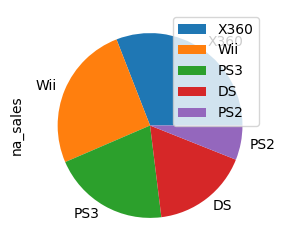

In [63]:
games_top_5_na.plot(kind='pie', figsize=(3,3), y='na_sales')

          na_sales  na_sales_share
platform                          
X360        588.84           61.79
Wii         486.87           54.63
PS3         390.13           41.89
DS          323.99           49.44
PS2         114.89           43.22
          eu_sales  eu_sales_share
platform                          
PS3         327.21           35.13
X360        267.89           28.11
Wii         258.32           28.99
DS          142.99           21.82
PS4         141.09           44.91
          jp_sales  jp_sales_share
platform                          
DS          141.49           21.59
3DS         100.62           39.03
PS3          79.41            8.53
PSP          70.63           29.60
Wii          68.28            7.66
          other_sales  other_sales_share
platform                                
PS3            134.59              14.45
X360            84.24               8.84
Wii             77.71               8.72
PS2             68.70              25.85
PS4             48.

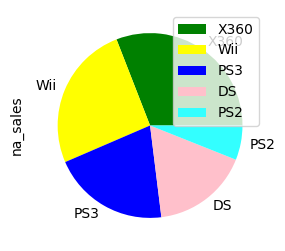

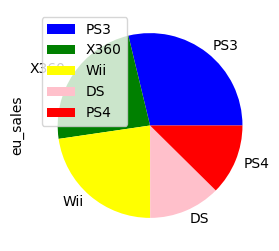

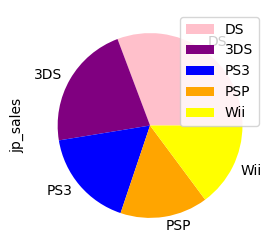

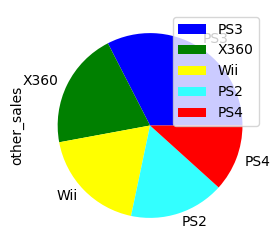

In [64]:
for column_name in sales_column_names:
    share_column_name = column_name + '_share'
    games_top_5 = games_by_platform_sales[[column_name, share_column_name]].sort_values(by=column_name, ascending=False).head()
    #print(column_name, share_column_name)
    print(games_top_5)
    colors = {'PS4': 'red', 'X360': 'green', '3DS': 'purple', 'Wii': 'yellow', 
              'PS2': '#33ffff', 'PSP': 'orange', 'PS3': 'blue', 'DS': 'pink'}
    labels = games_top_5.index #['platform']
    games_top_5.plot(kind='pie', figsize=(3,3), y=column_name, labels = labels, colors=[colors[key] for key in labels])

**Вывод:**

**В Северной Америке** наиболее популярна платформа X360, из всех суммарных продаж в мире в этом регионе они составляют 61%. Это объяснимо - консоль американская. На втором месте - Wii (американские продажи занимают почти половину мировых продаж, 54%), как ни странно, не WiiU, видимо, т.к. Wii вышло в 2006 году, в 2009 - пик, набрали продажи, а WiiU еще не успели (вышла в 2012 г).

По 40-50% всех продаж составили продажи в Америке каждой из еще трех платформ - PS3, DS, PS2, несмотря на то, что они японские.

В сумме продаж среди ТОП 5 в Америке преобладают японские консоли.

Американский рынок, по сравнению со всем миром, наиболее активен в отношении игровых приставок.

**В Европе** на первом месте японская консоль PS3 составляя 35% мировых продаж, на втором - американская X360 и японская Wii с одинаковой долей продаж на мировом рынке, около 28%. Меньшую часть продаж в равной степени в Европе занимают японские DS и PS4, хотя доли различаются, DS составляет 21%, в то время как  PS4 - 44% от всех мировых продаж.

**В Японии** игроки предпочитают свою консоль DS. Это единственный регион, где приставка 3DS попала в ТОП 5. Выпущенная в 2006 году она успела набрать своих почитателей. Хотя в мировых продажах это всего 21%. На втором месте 3DS, но в мире составляет большую долю, 39%, видимо, покорила своей эргономикой портативной раскладушки. Одинаковые продажи у PS3, PSP и Wii, хотя среди мировых продаж PSP сильно вырывается вперед по сравнению с двумя другими, составляет около 29%, в то время как эти две - по 8%

**В остальном мире** преобладают продажи японской консоли PS3, в мировых продажах это всего 14%, далее с большим отрывом американская X360, чуть меньше, почти поровну - Wii и PS2, меньше всех - PS4. Несмотря на то, что продажи PS2 и PS4 меньше чем X360 и Wii, доли их на мировом рынке значительно больше - 25% и 15% соответственно, когда как у последних двух - около 8%.

**Общий вывод:** игроки Америким и Японии предпочитают консоли производства своих стран, в Европе - в равной степени американские и японские, во всем остальном мире - большее доверие японским производителям.

## 5.2. Самые популярные жанры региона.

По жанрам воспользуемся таким же циклом, что и по платформам. Сразу для всех регионов.

In [65]:
games_actual_new['genre'].value_counts()

Action          2382
Sports          1262
Misc            1253
Adventure       1023
Role-Playing     996
Shooter          737
Simulation       606
Racing           562
Fighting         413
Strategy         393
Puzzle           366
Platform         340
Name: genre, dtype: int64

In [66]:
#сгруппимруем суммарные продажи по жанрам и регионам
games_by_genre_sales = games_actual_new.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].sum()
games_by_genre_sales

,na_sales,eu_sales,jp_sales,other_sales,total_sales
genre,,,,,
Action,530.44,350.70,102.07,133.44,1116.65
Adventure,61.52,37.90,29.53,12.40,141.35
Fighting,94.31,42.63,28.61,22.87,188.42
Misc,285.06,146.88,64.53,58.39,554.86
Platform,134.25,81.62,35.20,28.67,279.74
Puzzle,42.49,27.77,12.43,7.23,89.92
Racing,132.93,113.39,13.20,39.48,299.00
Role-Playing,199.63,110.62,170.38,41.77,522.40
Shooter,373.13,238.89,19.35,85.67,717.04


In [67]:
genre_column_names = []
shares_column_names = []
for (column_name, column) in games_by_genre_sales.transpose().iterrows():
    if column_name !='total_sales':
        print (column_name)
        new_column_name = column_name + '_share'
        print(new_column_name)
        genre_column_names.append(column_name)
        shares_column_names.append(new_column_name)
        games_by_genre_sales[new_column_name] = ((games_by_genre_sales[column_name] / games_by_genre_sales['total_sales']) * 100).round(2)
print(genre_column_names)
shares_column_names

na_sales
na_sales_share
eu_sales
eu_sales_share
jp_sales
jp_sales_share
other_sales
other_sales_share
['na_sales', 'eu_sales', 'jp_sales', 'other_sales']


['na_sales_share', 'eu_sales_share', 'jp_sales_share', 'other_sales_share']

In [68]:
games_by_genre_sales

,na_sales,eu_sales,jp_sales,other_sales,total_sales,na_sales_share,eu_sales_share,jp_sales_share,other_sales_share
genre,,,,,,,,,
Action,530.44,350.70,102.07,133.44,1116.65,47.50,31.41,9.14,11.95
Adventure,61.52,37.90,29.53,12.40,141.35,43.52,26.81,20.89,8.77
Fighting,94.31,42.63,28.61,22.87,188.42,50.05,22.62,15.18,12.14
Misc,285.06,146.88,64.53,58.39,554.86,51.38,26.47,11.63,10.52
Platform,134.25,81.62,35.20,28.67,279.74,47.99,29.18,12.58,10.25
Puzzle,42.49,27.77,12.43,7.23,89.92,47.25,30.88,13.82,8.04
Racing,132.93,113.39,13.20,39.48,299.00,44.46,37.92,4.41,13.20
Role-Playing,199.63,110.62,170.38,41.77,522.40,38.21,21.18,32.61,8.00
Shooter,373.13,238.89,19.35,85.67,717.04,52.04,33.32,2.70,11.95


              na_sales  na_sales_share
genre                                 
Action          530.44           47.50
Sports          396.64           49.96
Shooter         373.13           52.04
Misc            285.06           51.38
Role-Playing    199.63           38.21
         eu_sales  eu_sales_share
genre                            
Action     350.70           31.41
Sports     251.55           31.69
Shooter    238.89           33.32
Misc       146.88           26.47
Racing     113.39           37.92
              jp_sales  jp_sales_share
genre                                 
Role-Playing    170.38           32.61
Action          102.07            9.14
Misc             64.53           11.63
Sports           48.97            6.17
Platform         35.20           12.58
              other_sales  other_sales_share
genre                                       
Action             133.44              11.95
Sports              96.69              12.18
Shooter             85.67           

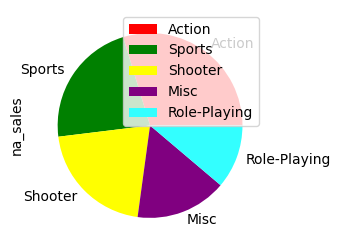

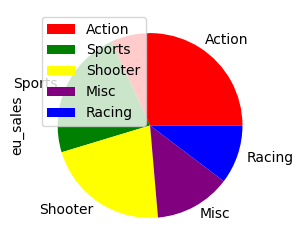

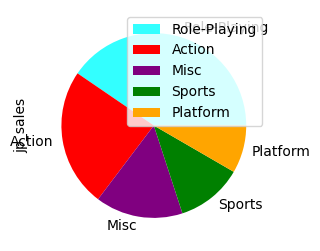

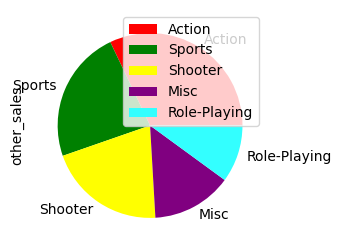

In [69]:
for index, item in enumerate(genre_column_names):
    share_column_name = shares_column_names[index]
    column_name = genre_column_names[index]
    games_top_5_genre = games_by_genre_sales[[column_name, share_column_name]].sort_values(by=column_name, ascending=False).head()
    #print(column_name, share_column_name)
    print(games_top_5_genre)
    colors = {'Action': 'red', 'Sports': 'green', 'Misc': 'purple', 'Shooter': 'yellow', 
              'Role-Playing': '#33ffff', 'Platform': 'orange', 'Racing': 'blue'}
    labels = games_top_5_genre.index 
    games_top_5_genre.plot(kind='pie', figsize=(3,3), y=column_name, labels = labels, colors=[colors[key] for key in labels])    

**Вывод:**

**В Северной Америке** игроки отличаются активным образом жизни, больше всего они предпочитают **Action**, чуть меньше, в равной степени, **Sports и Shooter**, и лишь совсем немного хотят играть в ролевые игры **Role-Playing**. 

Несмотря на подавляющие продажи в Америке Action, не они занимают первое место по доле рынка, в равной степени три жанра, Action, Sports, Shooter, и группа Misc занимают половину мировых продаж в каждом из типов жанров.

**В Европе** жанр **Action** также занимает первое место, игроки аналогично Америке показывают свою активность, предпочитая после Action жанры **Sports и Shooter** в равной степени, натретьем месте также разные другие, а на последнем, в отличие от Америки - столь же активные гонки **Racing**

Все жанры ТОП 5 в Европе распределились ровно по долям рынка - каждый занимает около 30% мировых продаж.

**В Японии** больше любят как раз играть, предпочитая **Role-Playing**, это единственная страна, где жанр ролевых игр на первом месте, и долю  рынка они заняли немалую - около 30% игр этого жанра продается именно в Японии. Жанру **Action** японцы отдают второе место, хотя доля их в мировых продажах - всего 9%. группа игр **Misc** - на третьем месте у японцев, спортивные игры еще меньше их интересуют, а **Platform** - на последнем месте из пяти, но долю мировых продаж занимают в два раза больше, чем Sports (12% и 6% соответственно)

**В остальном мире** также больше всего любят **Action**, спорт и пострелять - продаются во всем мире почти с одинаковым успехом, **Role-Playing** - на последнем месте в суммарных продажах, также, и долю продаж во всем мире занимают наименьшую - 8%

**Общий вывод:** 

Во всем мире лидирует жанр **Action**, его предпочитают игроки всех стран, кроме Японии, зато именно в Японии, на первом месте **Role-Playing**, и именно здесь **Sports и Shooter** отсутствует в тройке лидеров, в то время как во всем мире они занимают стабильно второе и третье место. **Racing** вошел в ТОП 5 только в Европе, в других странах этого жанра нет в лидерах, европейцы ролевым играм предпочли гонки.

Больше всего пострелять любят в Америке, у жанра **Shooter** там самая большая доля продаж - 52%. 

Меньше всего спорт любят японцы, можно так подумать, жанр **Sports** у японцев занимает самую мкеньшую долю - 6%

## 5.3.	Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [70]:
esrb = games_actual_new.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum')
esrb

,eu_sales,jp_sales,na_sales,other_sales
rating,,,,
E,461.09,120.36,796.98,162.54
E10+,173.35,36.57,315.40,67.51
EC,0.00,0.00,1.32,0.08
M,398.90,43.79,574.33,140.70
RP,0.03,0.00,0.00,0.01
T,235.44,83.90,424.14,105.85
unknown,227.19,276.69,274.50,76.35


In [71]:
esrb = esrb.reset_index()
esrb

,rating,eu_sales,jp_sales,na_sales,other_sales
0,E,461.09,120.36,796.98,162.54
1,E10+,173.35,36.57,315.40,67.51
2,EC,0.00,0.00,1.32,0.08
3,M,398.90,43.79,574.33,140.70
4,RP,0.03,0.00,0.00,0.01
5,T,235.44,83.90,424.14,105.85
6,unknown,227.19,276.69,274.50,76.35


In [72]:
esrb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rating       7 non-null      object 
 1   eu_sales     7 non-null      float64
 2   jp_sales     7 non-null      float64
 3   na_sales     7 non-null      float64
 4   other_sales  7 non-null      float64
dtypes: float64(4), object(1)
memory usage: 408.0+ bytes


In [73]:
#esrb['rating'] = esrb['rating'].replace({'E': 'E - Для всех', 'E10+': 'E10+ - > 10 лет'})

In [74]:
esrb['rating'] = esrb['rating'].replace({'E': 'E: Для всех', 'E10+': 'E10+: > 10 лет', 'EC': 'EC: > 3 лет', 'M': 'M: > 17 лет', 'RP': 'RP: Не присвоен', 'T': 'T: > 13 лет'})
esrb['rating']

0        E: Для всех
1     E10+: > 10 лет
2        EC: > 3 лет
3        M: > 17 лет
4    RP: Не присвоен
5        T: > 13 лет
6            unknown
Name: rating, dtype: object

Text(0.5, 1.0, 'Влияние рейтинга ESRB на проажи в регионах')

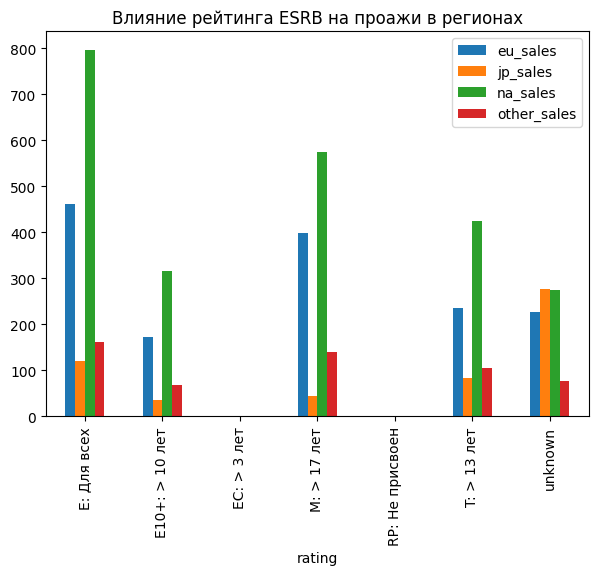

In [75]:
esrb.plot(x='rating', kind='bar', figsize=(7, 5))
plt.title('Влияние рейтинга ESRB на проажи в регионах', fontsize=12)

array([[<AxesSubplot: title={'center': 'eu_sales'}, xlabel='rating'>,
        <AxesSubplot: title={'center': 'na_sales'}, xlabel='rating'>],
       [<AxesSubplot: title={'center': 'jp_sales'}, xlabel='rating'>,
        <AxesSubplot: title={'center': 'other_sales'}, xlabel='rating'>]],
      dtype=object)

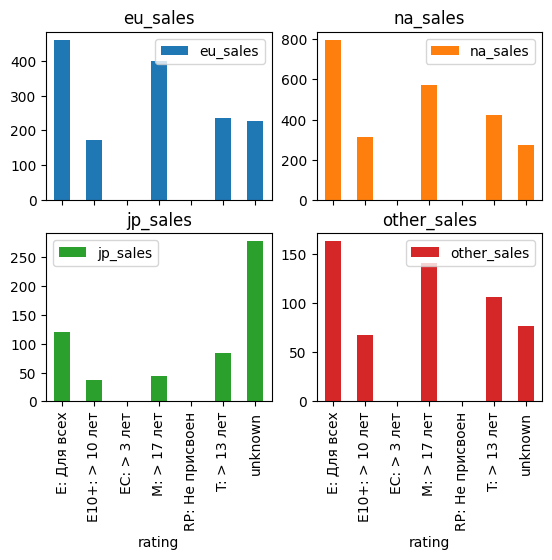

In [76]:
esrb.plot.bar(y=['eu_sales','na_sales','jp_sales','other_sales'], x='rating', subplots=True, layout=(2,2))

**Вывод:**

Разумеется, рейтинг ESRB влияет на продажи. Это показательно видно на рейтинге **E (Everyone) - Для всех**, в каждом регионе продажи игр с таким рейтингом занимает первое место. Далее - по возрастным группам, по убыванию продаж: 
 - 2 место **M (Mature) - Для взрослых, старше 17 лет**;
 - 3 место **T (Teen) - Подросткам, старше 13 лет**;
 - 4 место **E10+ (Everyone 10 and older) - Для всех от 10 лет и старше**;
 
**EC (Early childhood) - Для детей младшего возраста, от 3 лет** - игры, которым присвоен такой рейтинг, продавались только в Северной Америке. Это объяснимо - колмпания ESRB была создана в 1994 году для принятия и определения рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. Этим же можно объяснить и то, что в Японии на первом месте не игры "Для всех", а неизвестные значения (пропущенные), игры на японских консолях в меньшей степени подвергались рейтингу ESRB.

# 6. Проверка гипотез.

## 6.1. Первая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

In [77]:
XOne_user = games_actual_new.query('platform == "XOne" and user_score > 0')['user_score']
PC_user = games_actual_new.query('platform == "PC" and user_score > 0')['user_score']
print('Средний пользовательский рейтинг платформы XOne:', XOne_user.mean())
print('Средний пользовательский рейтинг платформы PC:', PC_user.mean())

Средний пользовательский рейтинг платформы XOne: 6.521428571428572
Средний пользовательский рейтинг платформы PC: 6.830081300813008


Выдвигаем нулевую и альтернативную гипотезы:

H_0: Средний пользовательский рейтинг платформы XOne = Средний пользовательский рейтинг платформы PC

H_a: Средний пользовательский рейтинг платформы XOne ≠ Средний пользовательский рейтинг платформы PC

Используем двусторонний t-критерий для проверки двух совокупностей. Так как сравниваем две совокупности на равенство, применяем метод st.ttest_ind. Двусторонний - так как совокупности либо равны, либо нет, а если нет, то они могут расходиться в обе стороны (быть меньше, или больше относительно друг друга).

In [78]:
results = st.ttest_ind(XOne_user, PC_user, equal_var = False) # results = вызов метода для проверки гипотезы

alpha = 0.05 

print(results.pvalue) # вывод значения p-value на экран 

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC разные.")
else:
    print("Не получилось отвергнуть нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.") 

0.01014021353497224
Отвергаем нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC разные.


**Вывод:**

Гипотеза не подтвердилась. Средние пользовательские рейтинги платформ Xbox One и PC разные.

## 6.2. Вторая гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [79]:
Action_user = games_actual_new.query('genre == "Action" and user_score > 0')['user_score']
Sports_user = games_actual_new.query('genre == "Sports" and user_score > 0')['user_score']
print('Средний пользовательский рейтинг жанра Action:', Action_user.mean())
print('Средний пользовательский рейтинг жанра Sports:', Sports_user.mean())

Средний пользовательский рейтинг жанра Action: 6.878625377643504
Средний пользовательский рейтинг жанра Sports: 6.416420118343195


Выдвигаем нулевую и альтернативную гипотезы:

H_0: Средний пользовательский рейтинг жанра Action = Средний пользовательский рейтинг жанра Sports

H_a: Средний пользовательский рейтинг жанра Action ≠ Средний пользовательский рейтинг жанра Sports

Используется также двусторнний t-критерий.

In [80]:
# results = вызов метода для проверки гипотезы, имеем в виду, что дисперсии разные
results = st.ttest_ind(Action_user, Sports_user, equal_var = False) 
alpha = 0.05 

print(results.pvalue) # вывод значения p-value на экран 

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. Средние пользовательские рейтинги жанров Action и Sports разные.")
else:
    print("Не получилось отвергнуть нулевую гипотезу. Средние пользовательские рейтинги жанров Action и Sports одинаковые.")

5.319061853268226e-10
Отвергаем нулевую гипотезу. Средние пользовательские рейтинги жанров Action и Sports разные.


**Вывод:**

Поставленная гипотеза подтвердилась. Средние пользовательские рейтинги жанров Action и Sports разные.

# 7. Общий вывод.

**1.На этапе подготовки данных:**

 - привели названия столбцов к общему нижнему регистру;
 - изменили необходимые типы данных;
 - обработали пропуски: в годе выпуска заменили на нули, в оценке пользователей и критиков оставили, в рейтинге заменили на unknown, в столбцах name genre пропуски удалили (всего 2 строки);
 - в рейтингов пользователей обнаружили не только пропуски, но еще строковые значения **tbd**, которые обозначают "не определено", заменили их на nan, чтобы потом перевести в float;
 - добавили новый столбец с суммарными продажами;
 
**2. Исследовательский анализ:** 
 
  - Выпуск компьютерных игр начался в 1980 году, рост - в 1995, скачок наблюдается в 2002 году, пик в 2008-2009 годах, в 2011 резкий спад. 
  - Из 31 платформы за весь период для подробного анализа оставили ТОП 10, выяснили, что каждая платформа в среднем "живет" около 10 лет, пика продаж достигает лет через 5 после выпуска. Из десяти наиболее прибыльных платформ большинство появилось в 2000х годах, в основном - в 2005-2006 гг. Наиболее длительное использование из ныне существующих - платформы PC (с 1992 г по 2016 г), самые "молодые" - PS4 и XOne (выпустились в 2013 г);
  - Актуальным периодом для исследования определили период с 2006 по 2016 гг;
  - Выяснили, что на продажи компьютерных игровых приставок влияют оценки критиков, отзывы пользователей - в гораздо меньшей степени, к тому же - в основном негативно (так как если пишутся отзывы игроков, то больше о том, что не понравилось);
  - Три самых прибыльных жанра игр: Action, Sports и Shooter, на последнем месте - Puzzle и Strategy - как на протяжении всего периода, так и в настоящее время;
  - Три самые популярные игровые платформы (по медианам суммарных продаж): XOne, WiiU и PS4 
  
**3. Портрет пользователя региона:**
 
 **Северная Америка.**
 
  - самая популярная платформа - X360 (американская), но в сумме продаж в ТОП 5 преобладают японские консоли - Wii, PS3, DS, PS2, меньше всего пользуется спросом игровая приставка GBA (японская, шестого поколения);
  - самый популярные жанры компьютерных игр (в порядке убывания): Action, Sports и Shooter, наименее популярны Strategy;
  - рейтинг ESRB (в порядке убывания): E (для всех), M (для взрослых, старше 17 лет), T (старше 13 лет), E10+ (от 10 лет), в Северной Америке, единственной, есть игры с рейтингом E3+ (для детей от 3х лет).
  
**Европа.**
  
  - платформы: популярные - PS3, X360, Wii, DS, PS4, наименее интересна платформа GBA (аналогично Америке);
  - жанры: наиболее популярны - Action, Sports и Shooter, Misc, Racing, меньше всего играют в Strategy;
  - рейтинг ESRB: E, M, T, E10+
  
**Япония.**
  
  - платформы: ТОП 5 - DS, 3DS, PS3, PSP, Wii. Единственная страна, где в ТОП 5 платформ нет американской X360; самая наименее востребованные - GS и XOne;
  - жанры: Role-Playing, Action, Mics, Sports, Platform, менеьше всего играют в Puzzle;
  - рейтинг ESRB: больше всего неизвестных (Компания ESRB - Американская, японские игры меньше проходят через их оценку), далее - E, T, M, E10+
  
**Доли продаж.**

Самый активный рынок продаж игровых приставок - Северная Америка, около половины всех мировых продаж - 47,76%.

В Европе продается 29,94% игровых платформ среди всех продаж в мире.

В Японии - 11,23% от всех мировых продаж игровых приставок.

<div class="alert alert-info" role="alert">

Вернемся к проведению исследовательского анализа - по периоду 2012-2016 гг

</div>  

In [81]:
#сделаем срез за выбранный для анализа актуальный период
games_actual_1 = games.query('year_of_release >= 2012')['platform'].value_counts()
print(games_actual_1)
games_actual_1.info()

PS3     493
PSV     411
3DS     396
PS4     392
X360    292
PC      250
XOne    247
PSP     173
WiiU    147
Wii      54
DS       31
Name: platform, dtype: int64
<class 'pandas.core.series.Series'>
Index: 11 entries, PS3 to DS
Series name: platform
Non-Null Count  Dtype
--------------  -----
11 non-null     int64
dtypes: int64(1)
memory usage: 176.0+ bytes


<AxesSubplot: >

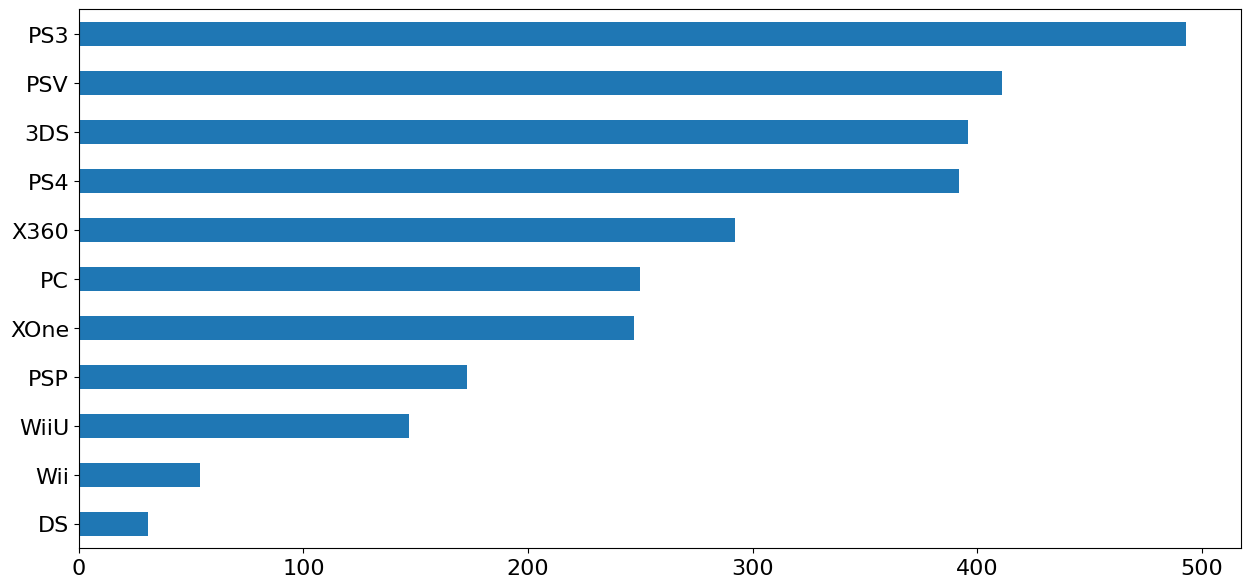

In [82]:
#сколько игр в каждой платформе выпускались после 2006 года
games_actual_1.sort_values(ascending = True).plot(kind = 'barh', figsize = (15, 7), legend = False, fontsize = 16)

In [83]:
games_actual_1 = games_actual_1.reset_index()
games_actual_1.columns = ['platform', 'games_count']
games_actual_1

,platform,games_count
0,PS3,493
1,PSV,411
2,3DS,396
3,PS4,392
4,X360,292
5,PC,250
6,XOne,247
7,PSP,173
8,WiiU,147
9,Wii,54


<class 'pandas.core.series.Series'>
['PS3', 'PSV', '3DS', 'PS4', 'X360', 'PC', 'XOne', 'PSP', 'WiiU', 'Wii', 'DS']


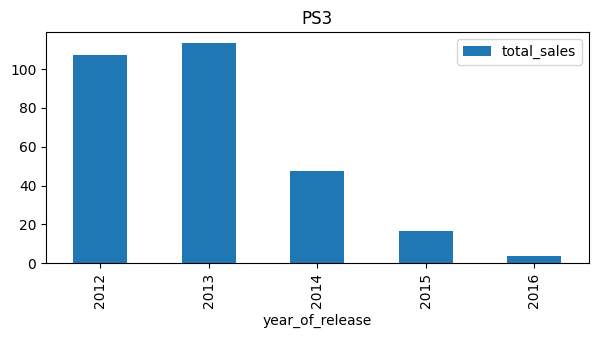

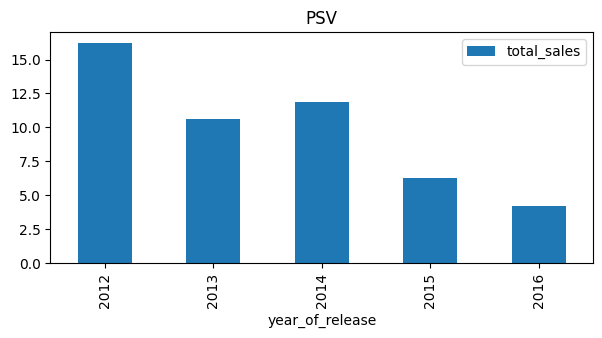

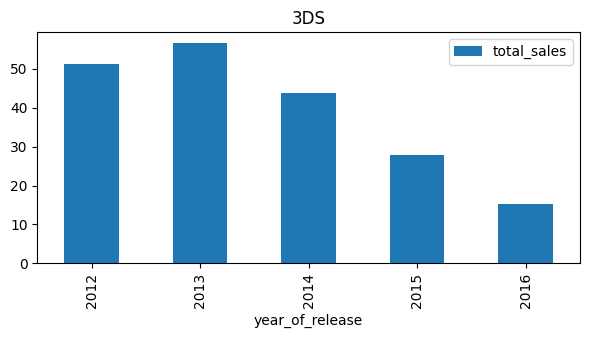

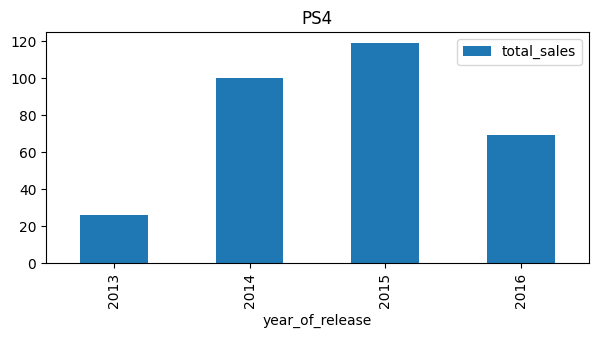

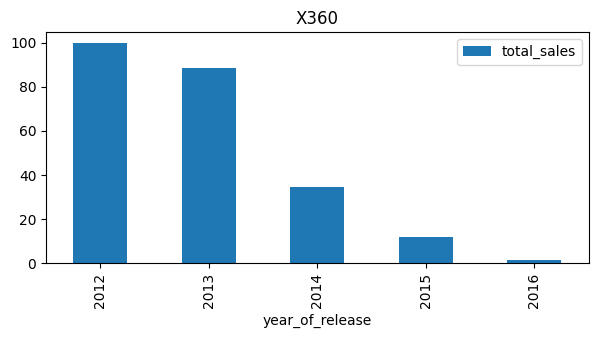

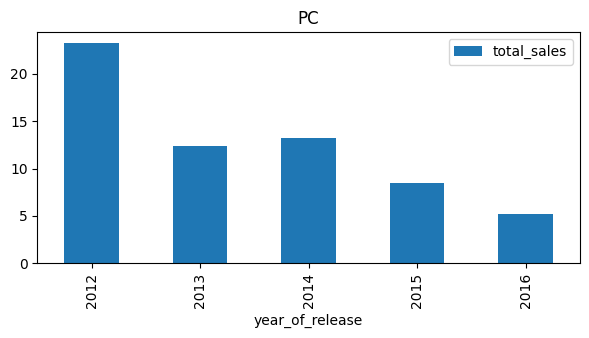

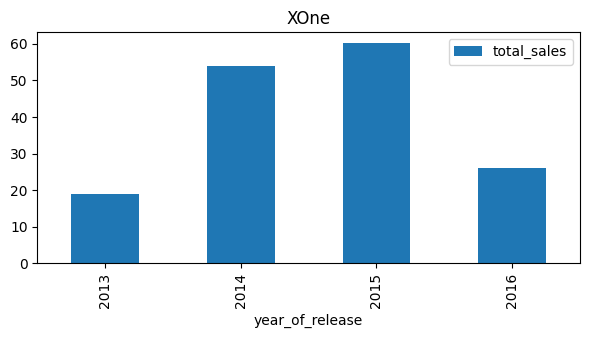

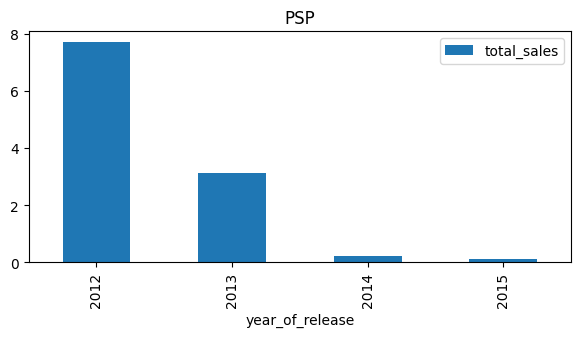

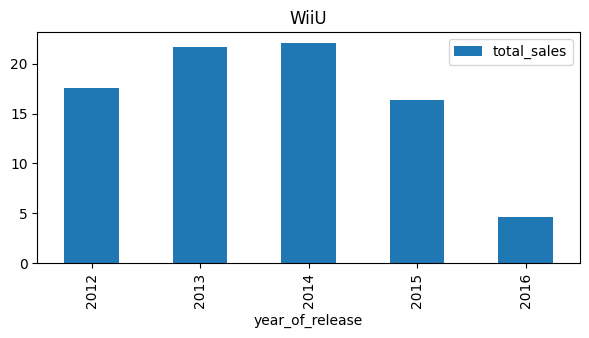

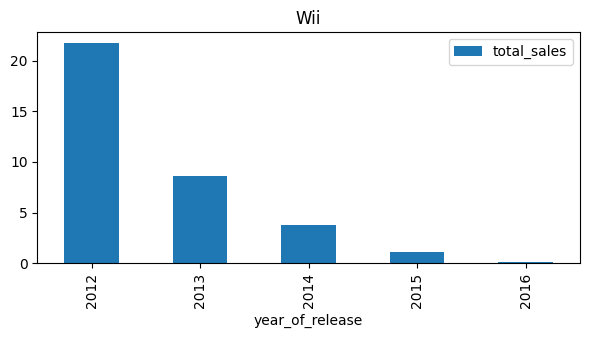

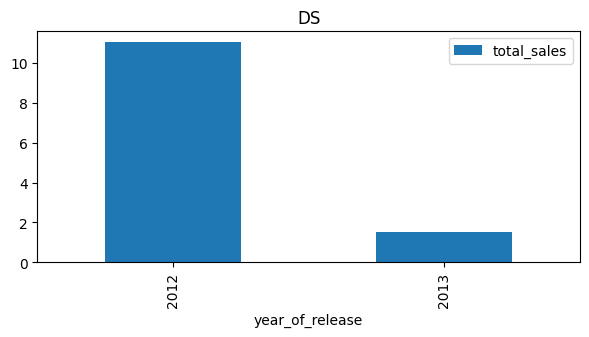

In [84]:
#рассмотрим каждую платформу
platforms_actual_1 = games_actual_1['platform'].values.tolist()

print(type(games_actual_1['platform']))
for platform in platforms_actual_1: 
    (
        games.loc[(games['platform'] == platform) & (games['year_of_release'] >= 2012)]
        .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
        .plot(kind = 'bar', figsize=(7,3))
    )
    
    plt.title(platform)

    #print(platform)
print(platforms_actual_1)

<div class="alert alert-info" role="alert">

С собой дальше берем следующие платформы:
    
 - PS3, 3DS, PSV, PS4, X360, PC, XOne, WiiU
    
</div>  

Text(0, 0.5, 'Продажи, млн копий')

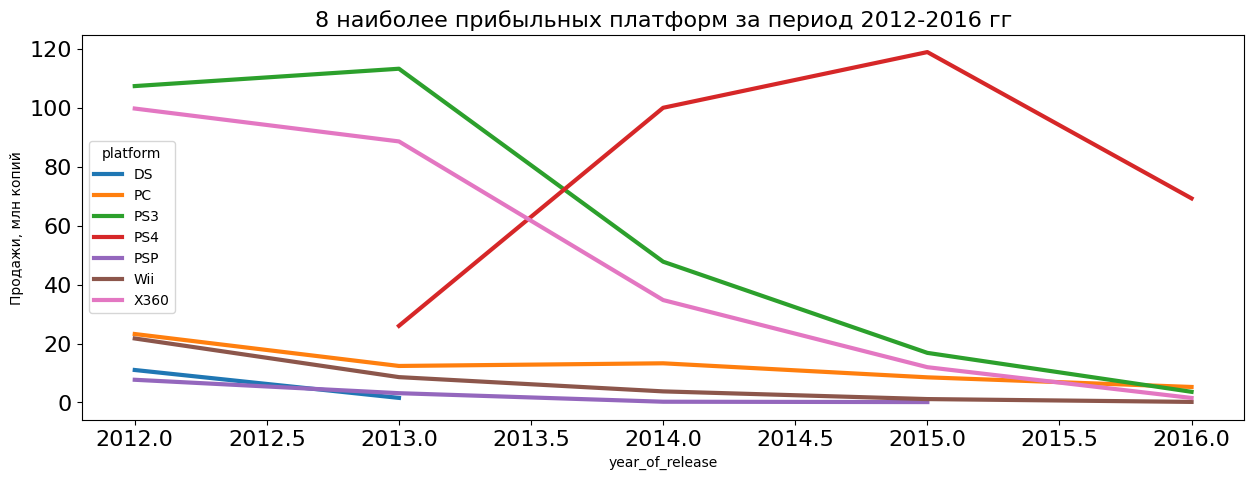

In [85]:
#cоотнесём выборки ТОП 10 по суммарным подажам, и за период 2012-2016 годы
(
    games.query('platform in @platforms and year_of_release >= 2012')
    .pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum')
    .plot(figsize=(15, 5), fontsize = 16, linewidth= 3)
)
plt.title('8 наиболее прибыльных платформ за период 2012-2016 гг', fontsize=16)
plt.ylabel('Продажи, млн копий')

<div class="alert alert-info" role="alert">

Лидер - платформа PS4, её оставляем, конечно.
Также возьмем: стабильную PC, уровень продаж по ней остался даже выше, чем у платформ с хорошим предыдущим успехом PS3 и X360 (их обе не будем брать, но посмотрим их на "ящике усов"), а также добавим потенциальные WiiU и XOne, и 3DS с PSV, чтобы сравнить на графике.

Посмотрим их все по медиане на графике сравнения.
    
</div>  

In [86]:
#определили перечень потенциально прибыльных платформ, с которым будем дальше работать
games_platform_potenc_1 = games.query('platform == "PC" \
                                      or platform == "PS4" \
                                      or platform == "XOne" \
                                      or platform == "3DS" \
                                      or platform == "PSV" \
                                      or platform == "WiiU" \
                                      or platform == "PS3" \
                                      or platform == "X360"')
                            
games_platform_potenc_1


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
...,...,...,...,...,...,...,...,...,...,...,...,...
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


Text(0.5, 0, 'Платформы')

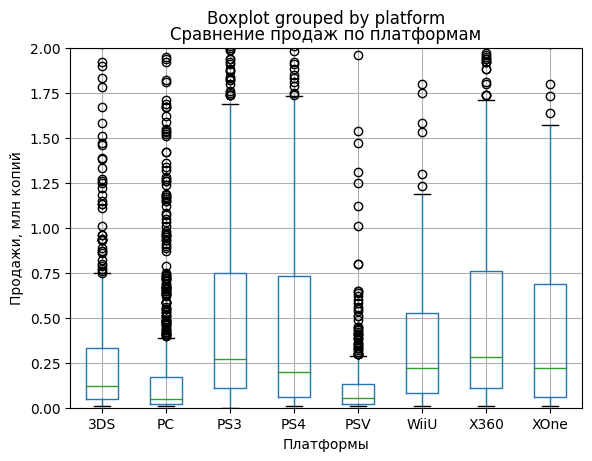

In [87]:
games_platform_potenc_1.boxplot(column = 'total_sales', by='platform').set(ylim=(0, 2))
plt.title('Сравнение продаж по платформам')
plt.ylabel('Продажи, млн копий')
plt.xlabel('Платформы')

<div class="alert alert-info" role="alert">

**Вывод: ТОП 5 самых прибыльных/популярных/перспективных плафторм:** (по убыванию)

За период 20012-2016 гг 

- X360
- PS3
- WiiU
- XOne
- PS4
    
<div>

<div class="alert alert-info" role="alert">

**Выведем рейтинг жанров компьютерных игр в последние годы, с 2012 по 2016 гг**
    
 Расчет - по медиане продаж
         
<div>

In [88]:
#будем рассматривать выборку по играм, выпущенным после 2012 года (включительно), используя медианное значение
games_genre_1 = (
    games.query('year_of_release >= 2012')
    .pivot_table(index='genre', values='total_sales', aggfunc='median')
    .sort_values(by='total_sales', ascending=False).reset_index()
    .rename_axis(None, axis=1)
)
games_genre_1.columns = ['genre', 'median_sales']
games_genre_1

,genre,median_sales
0,Shooter,0.440
1,Sports,0.240
2,Platform,0.210
3,Role-Playing,0.140
4,Racing,0.140
5,Fighting,0.130
6,Action,0.120
7,Misc,0.120
8,Simulation,0.120
9,Strategy,0.080


Text(0, 0.5, 'Продажи, по медиане')

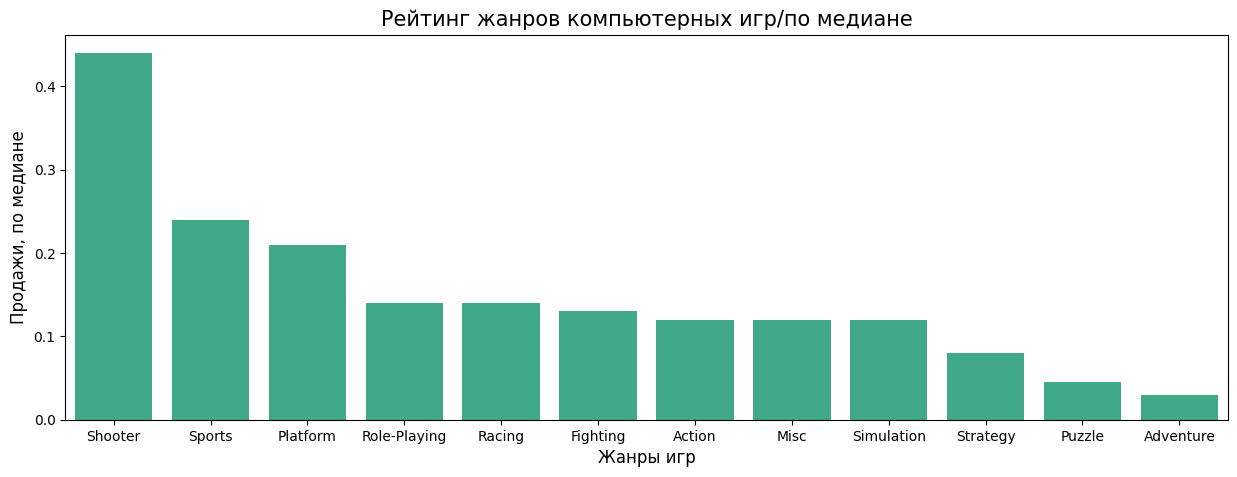

In [89]:
plt.figure(figsize=(15,5))
plt.title('Рейтинг жанров компьютерных игр/по медиане', fontsize=15)
sns.barplot(data=games_genre_1, x='genre', y='median_sales', color='#30ba8f')
plt.xlabel('Жанры игр', fontsize=12)
plt.ylabel('Продажи, по медиане', fontsize=12)

<div class="alert alert-info" role="alert">

**Вывод:**
    
Рейтинг компьютерных игр по жанру:    
 1. **Shooter** стал самым популярным жанром за период выпуска компьютерных игр 2012-2016 годы, любят люди пострелять активно.
 2. **Sports** стал вторым жанром в этом рейтинге
 3. **Platform** - на третьем месте (лазилки/ходилки/собиралки)
 4. **Role-Playing и Racing** разделили четвертое место
 5. **Fighting** занял пятое место
 6. **Action, Misc и Simulation** на шестом
 7. **Strategy**
 8. **Puzzle**
 9. **Adventure**
    
В данной выборке расчет был произведен по медиане продаж, за последние 5 лет, в отличие от предыдущей за 10 лет.
    
Можно увидеть как изменились вкусы и предпочтения игроков - пользователей игровых приставок.
 
Если раньше они больше увлекались **Action**, то сейчас все больше любят пострелять, **Shooter** вытеснил все остальные жанры с большим отрывом.
 
На последнем месте раньше стоял жанр **Strategy**, сейчас его заменил **Adventure**
         
<div>

In [90]:
#games_genre_1.plot(kind='bar', x='genre') - то же, что выше (другим графиком)
#plt.title('Распределение игр по жанрам', fontsize=15)
#plt.ylabel('Продажи, по медиане', fontsize=12)
#plt.xlabel('Жанры игр', fontsize=12)

<div class="alert alert-info" role="alert">

Посмотрим как распределились жанры среди трех самых популярных платфрм - **X360, PS3, WiiU**.
    
Расчет - по медиане продаж
         
<div>

In [91]:
#выборка трех самых популярных и прибыльных платформ
games_platform_popular_1 = games.query('platform == "X360" \
                                    or platform == "PS3" \
                                    or platform == "WiiU"')#[['X360', 'PS3', 'WiiU']] .pivot_table(index='genre', 
                                                                        #values='total_sales', 
                                                                     #   aggfunc='median').reset_index()
games_platform_popular_1

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16674,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.00,0.00,0.00,0.00,NaN,NaN,unknown,0.00
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


<div class="alert alert-info" role="alert">

В данном графике добавим **estimator**, позволяющий указать функцию **mean**. Расчет пойдет по среднему значению продаж
         
<div>

Text(0, 0.5, 'Продажи, по медиане')

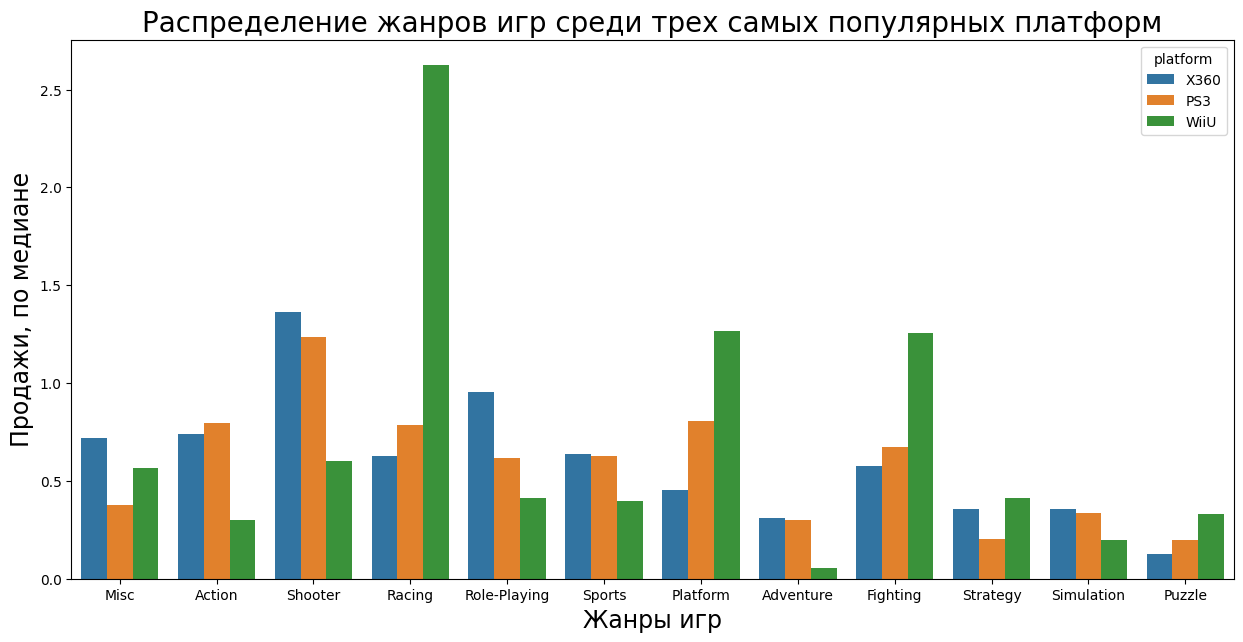

In [92]:
plt.figure(figsize=(15,7))
#fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x='genre', y='total_sales', hue='platform', estimator=np.mean, ci=None, data=games_platform_popular_1)
plt.title('Распределение жанров игр среди трех самых популярных платформ', fontsize=20)
plt.xlabel('Жанры игр', fontsize=17)
plt.ylabel('Продажи, по медиане', fontsize=17)

<div class="alert alert-info" role="alert">

Для подтверждения - выведем наивысшее значение в данном графике - продажи игр в жанре **Racing** на платформе **WiiU**.
    
В таблице ниже видно, что всего продажи по этому жанру в этой платформе составили 7.87, соответственно, разделив на 3, получим среднее 2.62 - что мы и получили на графике.
         
<div>

In [93]:
games_platform_popular_1.query('genre == "Racing" and platform == "WiiU"')[['total_sales', 'name']]

,total_sales,name
110,7.09,Mario Kart 8
3879,0.51,Sonic & All-Stars Racing Transformed
6273,0.27,Need for Speed: Most Wanted


<div class="alert alert-info" role="alert">

Но надо отдать должное функции **barplot** из **seaborn** - при выводе графика она как раз и считает среднее значение столбца **'y'** (в нашем случае **'total_sales'**).
    
Проверим, запустим без **estimator**.
         
<div>

Text(0, 0.5, 'Продажи, по медиане')

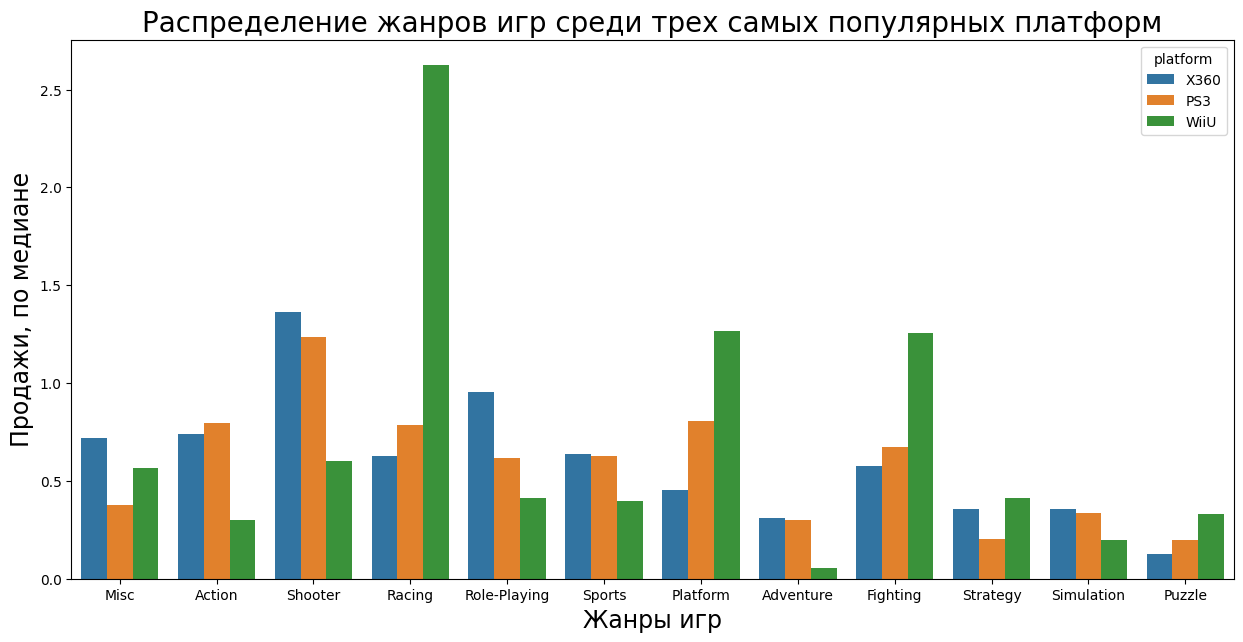

In [94]:
plt.figure(figsize=(15,7))
#fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x='genre', y='total_sales', hue='platform', ci=None, data=games_platform_popular_1)
plt.title('Распределение жанров игр среди трех самых популярных платформ', fontsize=20)
plt.xlabel('Жанры игр', fontsize=17)
plt.ylabel('Продажи, по медиане', fontsize=17)

<div class="alert alert-info" role="alert">

Получаем ту же картину, что и с **estamator=np.mean**.
  
Для сравнения - выведем суммарно **'total_sales'**, добавим **estimator=sum**.
         
<div>

Text(0, 0.5, 'Продажи, по медиане')

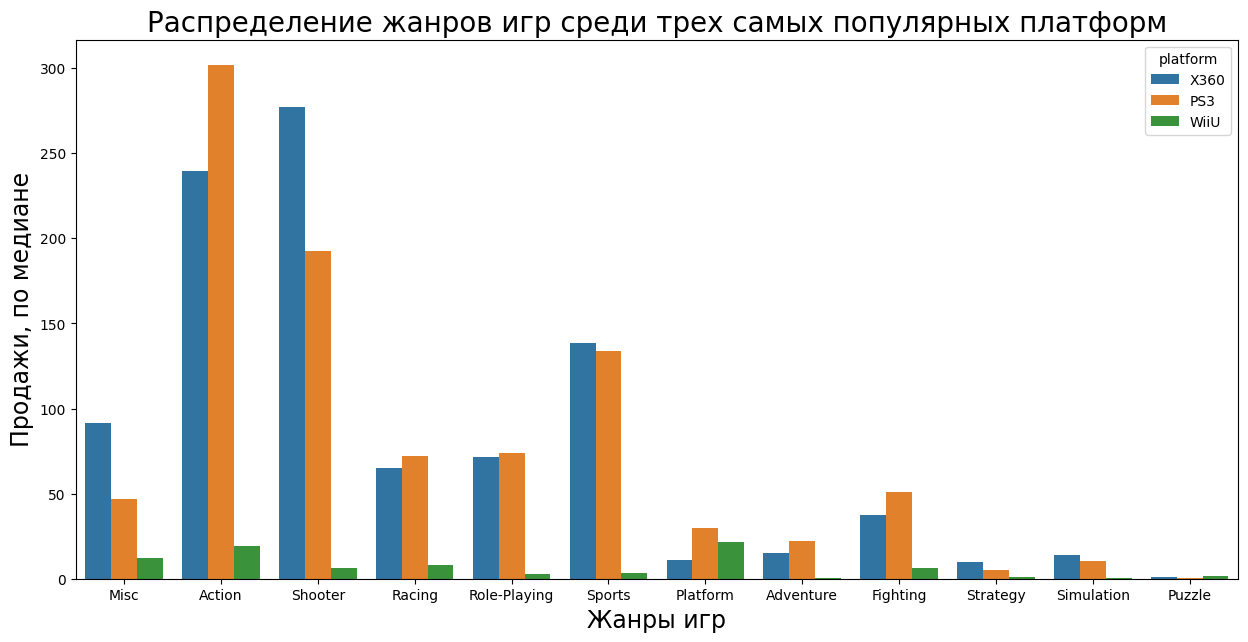

In [95]:
plt.figure(figsize=(15,7))
#fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x='genre', y='total_sales', hue='platform', estimator=sum, ci=None, data=games_platform_popular_1)
plt.title('Распределение жанров игр среди трех самых популярных платформ', fontsize=20)
plt.xlabel('Жанры игр', fontsize=17)
plt.ylabel('Продажи, по медиане', fontsize=17)

<div class="alert alert-info" role="alert">

Получаем совершенно другую картину, доказывающую вышесказанное - **sns.barplot** выводит средние значения по **'y'**.
  
<div>

<div class="alert alert-info" role="alert">

**Вывод:**

Резюмируем: для такой динамичной индустрии, как компьютерные игры, прогноз на следующий год лучше основывать на анализе не столь длительного предыдущего периода как 10 лет, а более короткого, хотя бы 5 лет, чтобы более точно и подробно можно было увидеть все тенденции данного рынка.

<div> 